# Random Forest (Random Ormanlar)

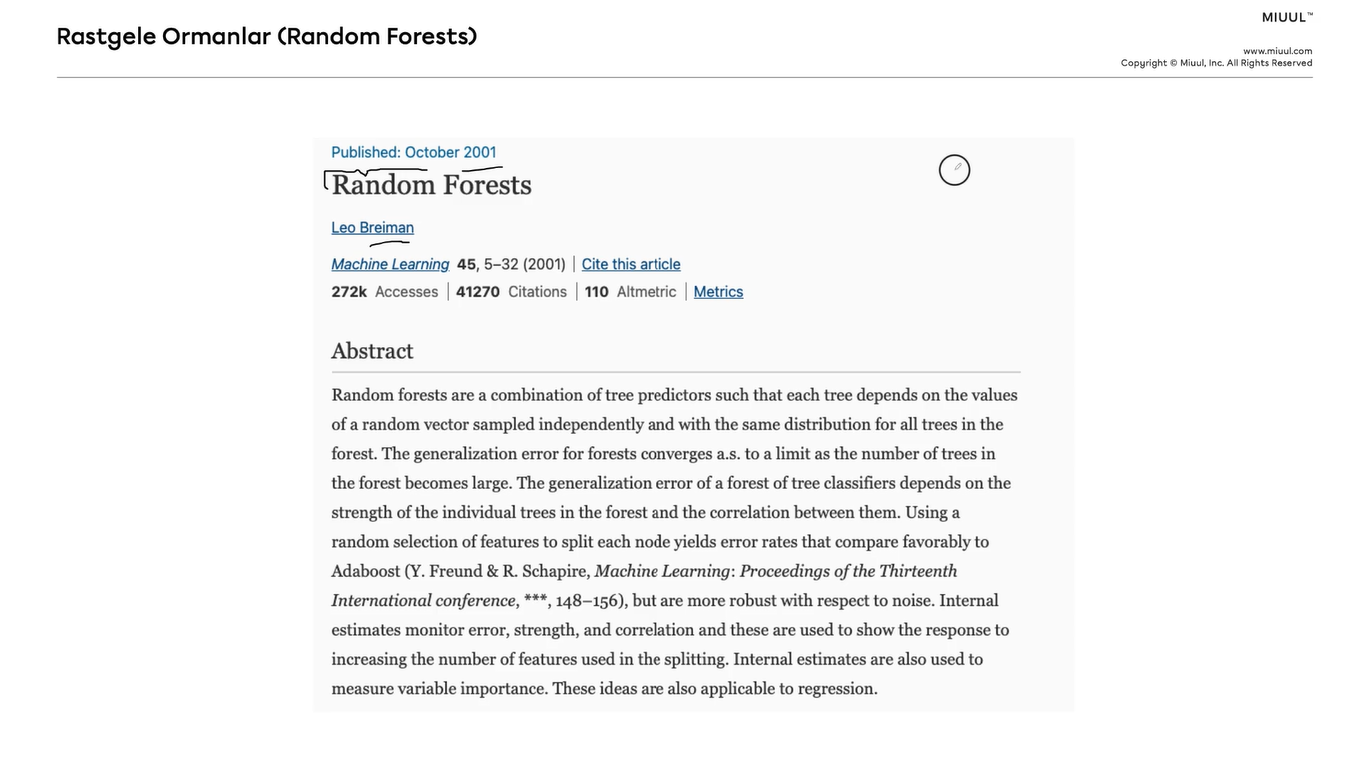

Nedir ?  
* Random forest' a neden random forest deriz(mülakat sorusu)
* Temeli birden çok karar ağacın ürettiği tahminlerin bir araya getirilerek değerlendirilmesine  
dayanır. 
* Bagging(Breiman,1996) ile Random Subspace(Ho,1998) yöntemlerinin birleşimi ile oluşmuştur 
* Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile değişkenler random subspace yöntemi ile seçilir.
* Karar ağacının her bir düğümünde en iyi dallara ayırıcı(bilgi kazancı) değişken tüm değişkenler arasında rastgele seçilen daha az sayıdaki değişken arasından seçilir. 
* Ağaç oluşturmada veri setinin 2/3'ü kullanılır.Dışarıda kalan veri ağaçlarının performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.Testde ise 1/3 ünü kullanır. 
* Her düğüm noktasında rastgele değişken seçimi yapılır.(regresyon'da p/3, sınıflama'da karekök p)  
* benzetme: meclis gibi bir araya gelip toplanıp herkesin tahminini sorup bir çıkarım yapma gibi düşünülebilir.

Bagging Predictors : 
* yeni ağaçlar oluşturmak ve bunun üzerinden tahminlerde bulunmak. 
* onlarca oluşturulan gözlem biriminden bir kısmı seçilip bir ağaç kuruluyor,sonra kalan için de aynı şekilde rastgele seçip işlem uyguluyor .

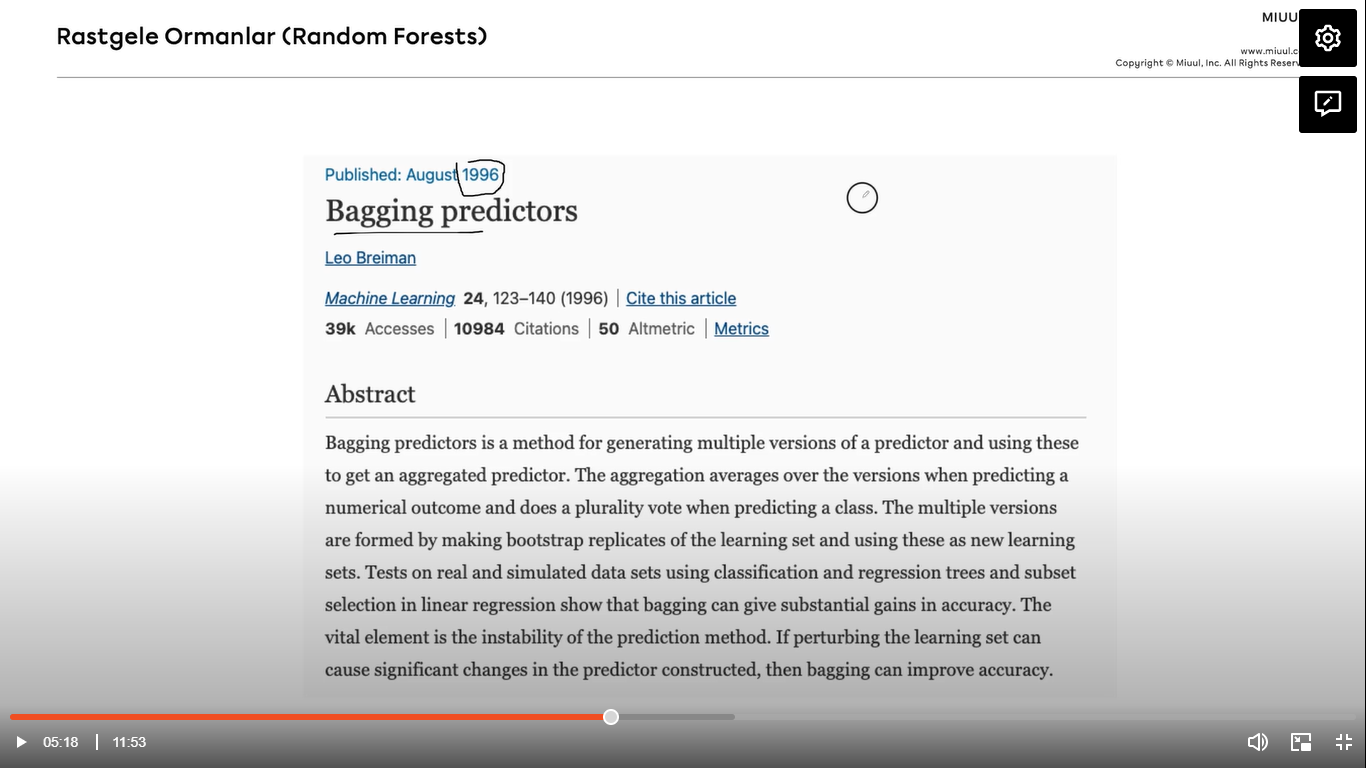

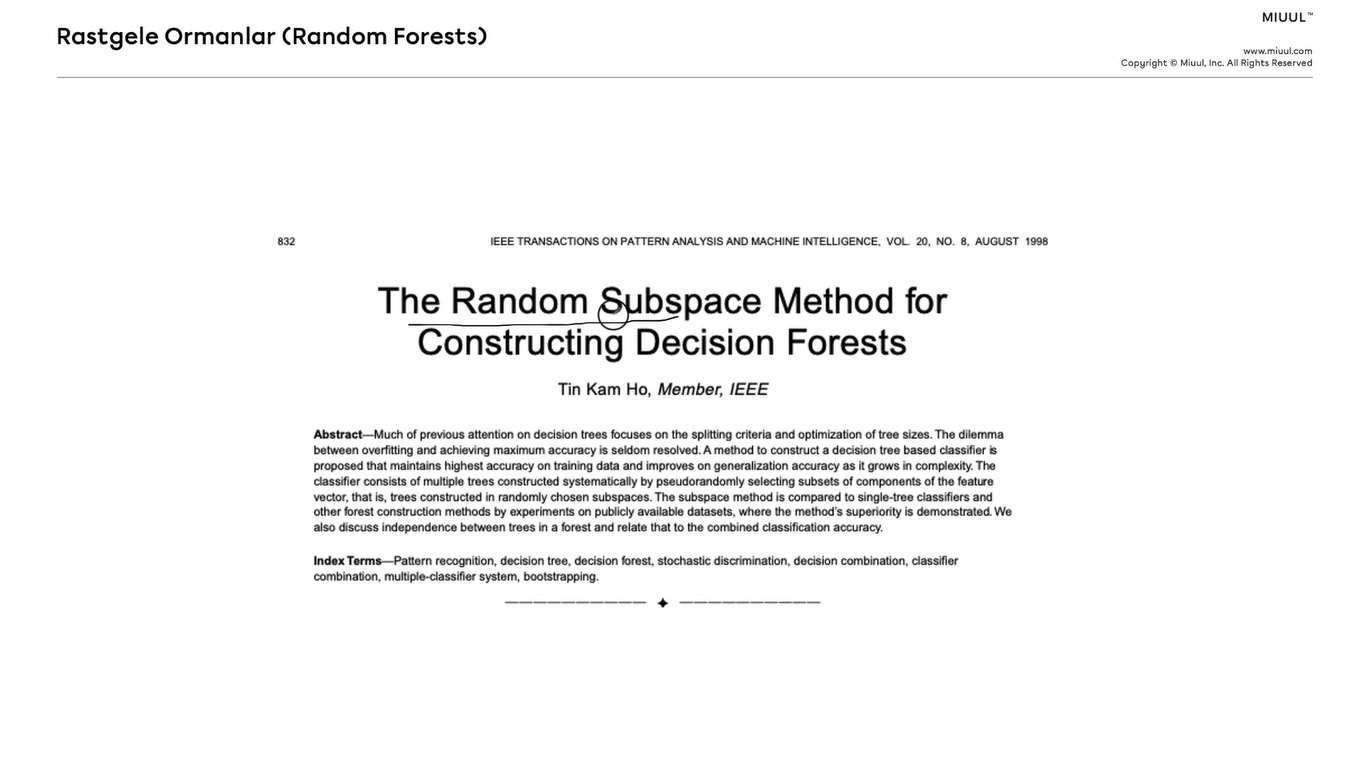

Random Subspace Mehtod: 
* baging ile bir araya gelerek gözlem seçiminde rastgeleliği getirerek random forestı oluşturuyor.

CART çok başarılı fakat aşırı öğrenmeye meyilli rastgeliliği korumak lazım 

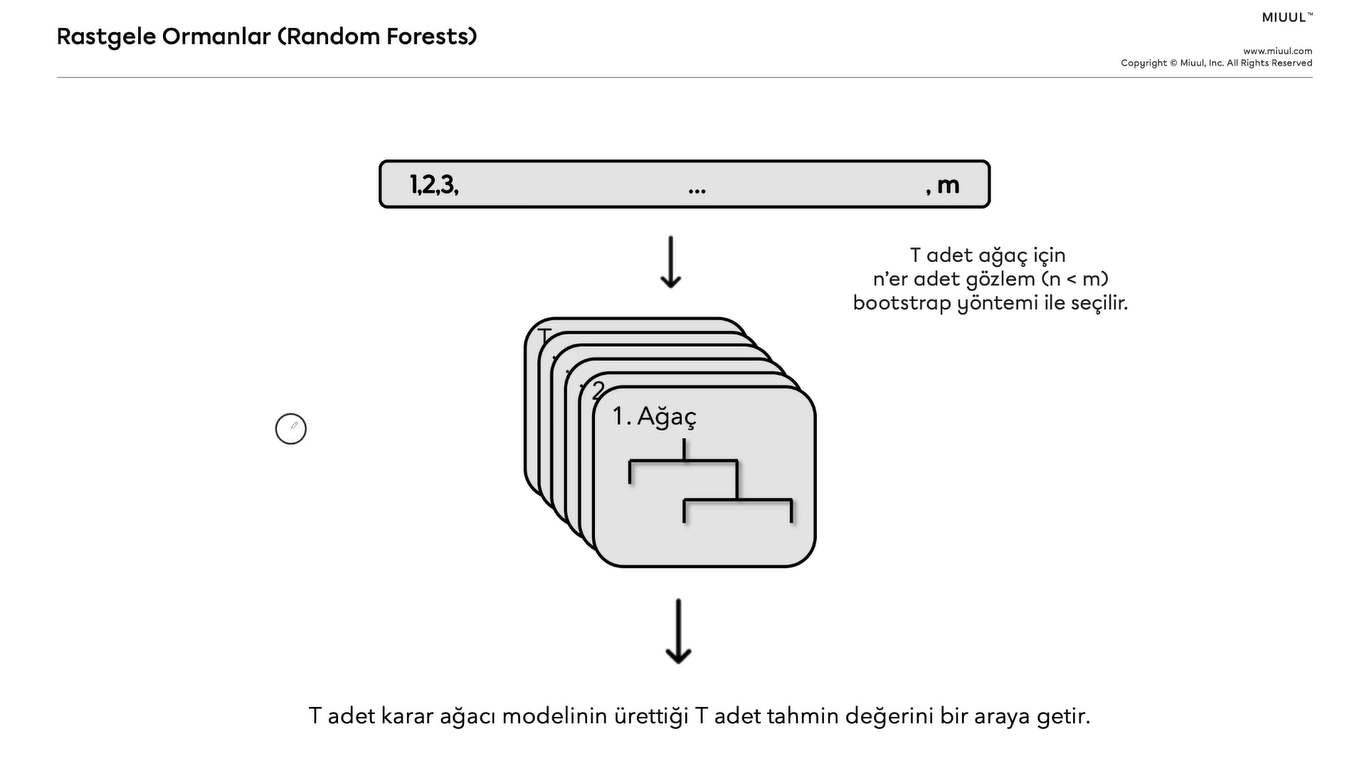

Baging yöntemi: 
* ağaçlar birbirinden bağımsız 
* 1000 tane değerimiz var burdan 750 tane gözlem birimini rastgele seçer , sonra bunu inceler geri tekrar yerine koyar sonra tekrardan rastgele 750 tane seçer ve yeniden inceler ve model kurulur. 
* ezberlemeye(overfitting) etmeye karşı dayanıklıdır

Bootstrap yöntemi : 
* ağaçların artıklar üzerine kurulur,ve bağımlılıları vardır(baging ile farkı)

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier 
from sklearn.model_selection import GridSearchCV,cross_validate,RandomizedSearchCV,validation_curve 

In [2]:
!pip install catboost

In [3]:
!pip install lightgbm

In [5]:
!pip install xgboost

In [2]:
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier 
from catboost import CatBoostClassifier

In [3]:
pd.set_option('display.max_columns',None) 
warnings.simplefilter(action='ignore',category=Warning)

In [4]:
df = pd.read_csv("datasets/diabetes.csv")

In [5]:
# bağımlı ve bağımsız değişkenleri seçelim
y=df["Outcome"] 
X = df.drop(["Outcome"],axis=1)

#### Random Forests

In [6]:
# random forest model nesnesini getirelim
rf_model = RandomForestClassifier(random_state=17)

In [7]:
# hiperparametrelere ihtiyaç var 
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

r_param öncesi hatalarımız bu

In [8]:
cv_results = cross_validate(rf_model,X,y,cv=10,scoring=["accuracy","f1","roc_auc"]) 

In [9]:
cv_results['test_accuracy'].mean()

0.753896103896104

In [10]:
cv_results['test_f1'].mean() 

0.6190701534636385

In [11]:
cv_results['test_roc_auc'].mean()

0.8233960113960114

bizi ilgilendirenler
* max_features -> bölünmelerde göz önünde bulundurulacak
* max_depth ->   
* criterion -> gini 
* bootstrap -> true  
* min_samples_split 
*** n_estimatores -> fit edilecek bağımsız ağaç sayısı

In [12]:
# en iyi değerin hangisi olacağını anlamak için "Gridsearch" ile aramamız gerekiyor 
# rf_params öncesinden cv_resulttaki hatadan daha düşük hata oranı bekleriz fakat eğer öyle değilse ön tanımlı   
# argümanları veri setinizde bulundurmadığınız içindir."none"""auto" gibi

In [13]:
rf_params = { 
             "max_depth":[3,8,None], 
             "max_features":[3,5,7,"auto"],
             "min_samples_split":[2,5,8,15,20],
             "n_estimators":[100,200,500]
            } 

In [14]:
# GridSearchCV yöntemi ile arama yapmamız lazım

In [15]:
 rf_best_grid = GridSearchCV(rf_model,rf_params, cv=5, n_jobs=-1, verbose= True).fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [16]:
# en iyi değerlerleri listele
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 8,
 'n_estimators': 500}

In [17]:
# ön tanımlı değerleri yeteri kadar iyi değilmiş, bu yüzden parametreleri set etmem lazım
# final modeli oluşturalım
rf_final = rf_model.set_params(**rf_best_grid.best_params_,random_state = 17).fit(X,y)


In [18]:
rf_final

RandomForestClassifier(max_features=5, min_samples_split=8, n_estimators=500,
                       random_state=17)

In [19]:
# sonuç ne olmuş ? 
# üsttekinden farklı olacak tekrardan run ettiğim için aynısı çıkmış olabilir.dikkate almayınız.
cv_results = cross_validate(rf_final,X,y,cv=10,scoring=["accuracy","f1","roc_auc"]) 

In [20]:
cv_results['test_accuracy'].mean()

0.766848940533151

In [21]:
cv_results['test_f1'].mean() 

0.6447777811143756

In [22]:
cv_results['test_roc_auc'].mean()

0.8271054131054132

#### Feature Importances

In [23]:
def plot_importance(model, features, num=len(X), save = False): 
    feature_imp = pd.DataFrame({'Value':model.feature_importances_, 'Feature':features.columns}) 
    plt.figure(figsize=(10,10)) 
    sns.set(font_scale = 1)  
    # sort_values ile küçükten büyüğe sıralıyoruz sonra barplot ile görselleştiriyoruz
    sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value", 
                                                                   ascending=False)[0:num]) 
    # num argümanı değişken sayısı kadar değer taşı demek istiyor 
    # kaydetmek istersek "save"  true dersek kaydeder.
    
    plt.title('Features') 
    plt.tight_layout() 
    plt.show() 
    if save: 
        plt.savefig('importances.png')

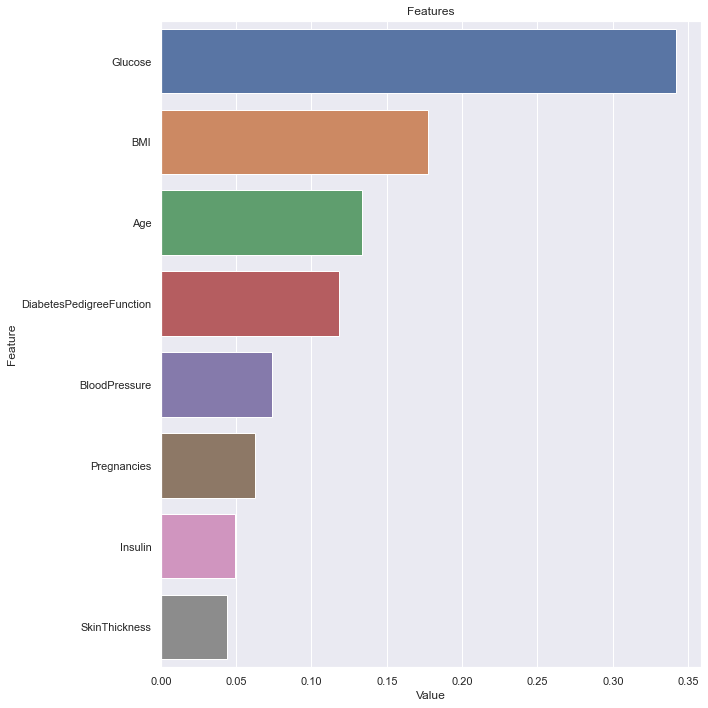

In [25]:
plot_importance(rf_final, X)

#### Learning Curve

In [26]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10): 
    train_score, test_score  = validation_curve( 
         model, X=X, y=y , param_name=param_name, param_range= param_range ,scoring=scoring, cv=cv) 
    
    mean_train_score = np.mean(train_score, axis=1) 
    mean_test_score  = np.mean(test_score, axis=1) 
    
    plt.plot(param_range, mean_train_score, 
             label = "Training Score", color = 'b') 
    
    plt.plot(param_range ,mean_test_score, 
            label = "Validation Score", color = 'g') 
    
    # __name__ ile modelin ismini dinamik şekilde alıyoruz
    plt.title(f"Validation Curve for {type(model).__name__}") 
    plt.xlabel(f"Number of {param_name}") 
    plt.ylabel(f"{scoring}") 
    plt.tight_layout() 
    plt.legend(loc='best') 
    plt.show()

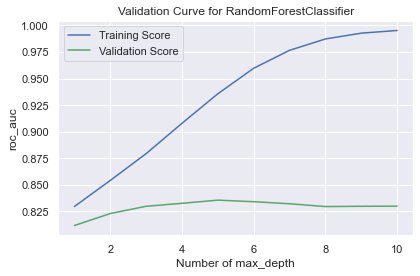

In [27]:
val_curve_params(rf_final, X,y, "max_depth",range(1,11),scoring="roc_auc")

In [28]:
# train skoru yükselmiş fakat test/validation skoru auc artmamış

# Gradient Boosting Machines (GBM)

Nedir ? 
* artık optimizasyonuna dayalı çalışan bir optimizasyon yöntemidir. 
* agaç yöntemine grid ve boostingin uygulanmasıdır.  
* hatalar/artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur

##### Adaptive Boosting(Adaboost) 

* Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrine dayanır.

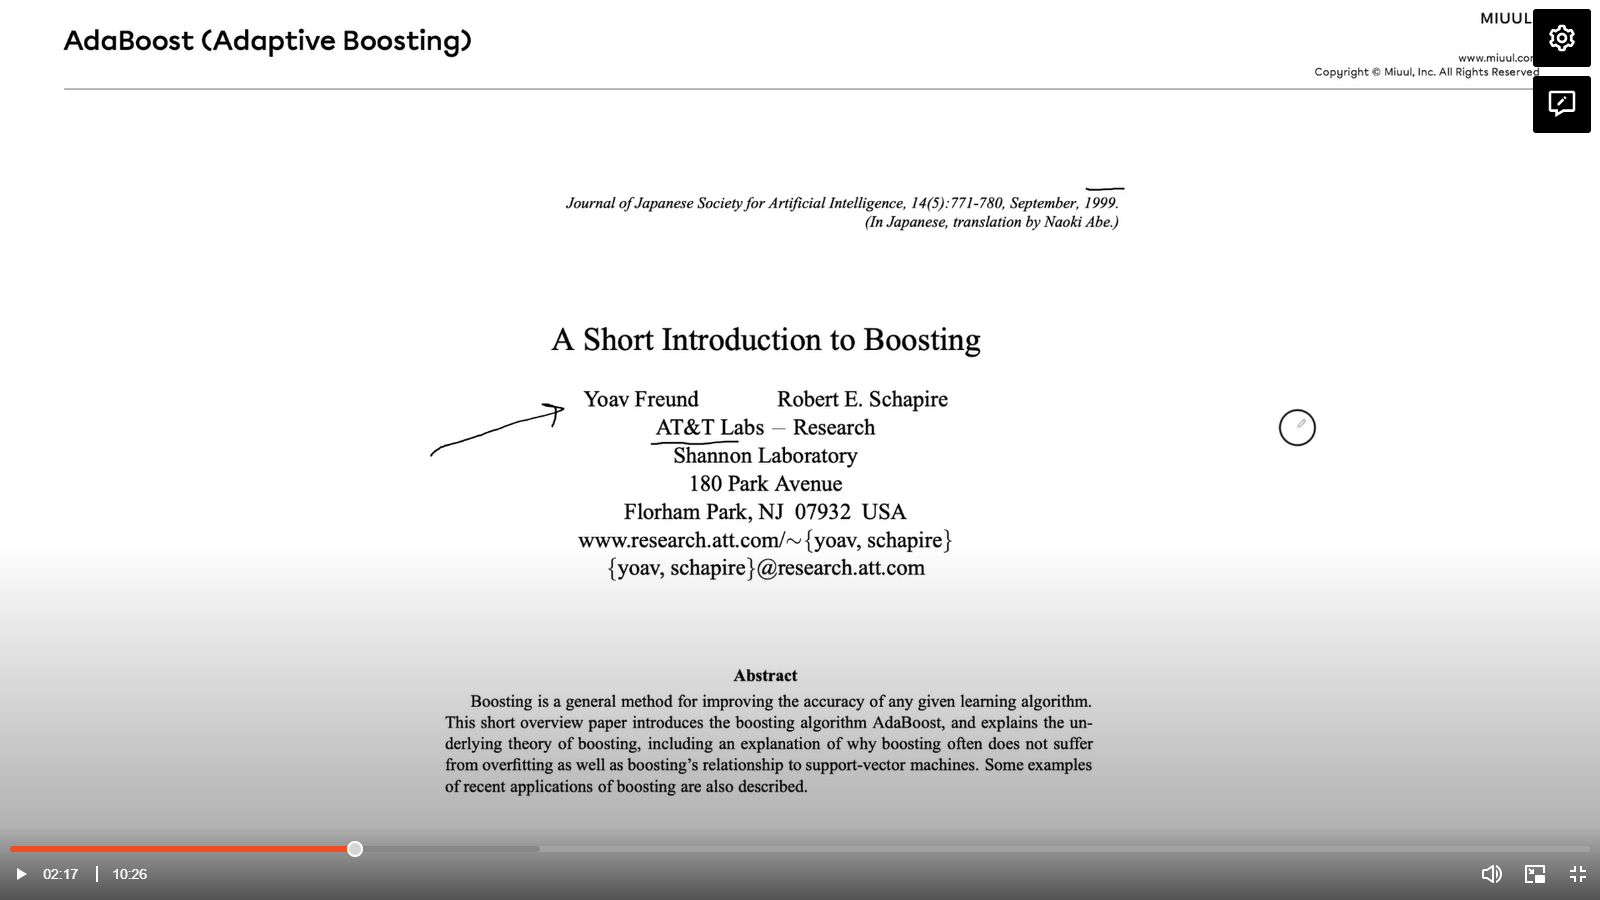

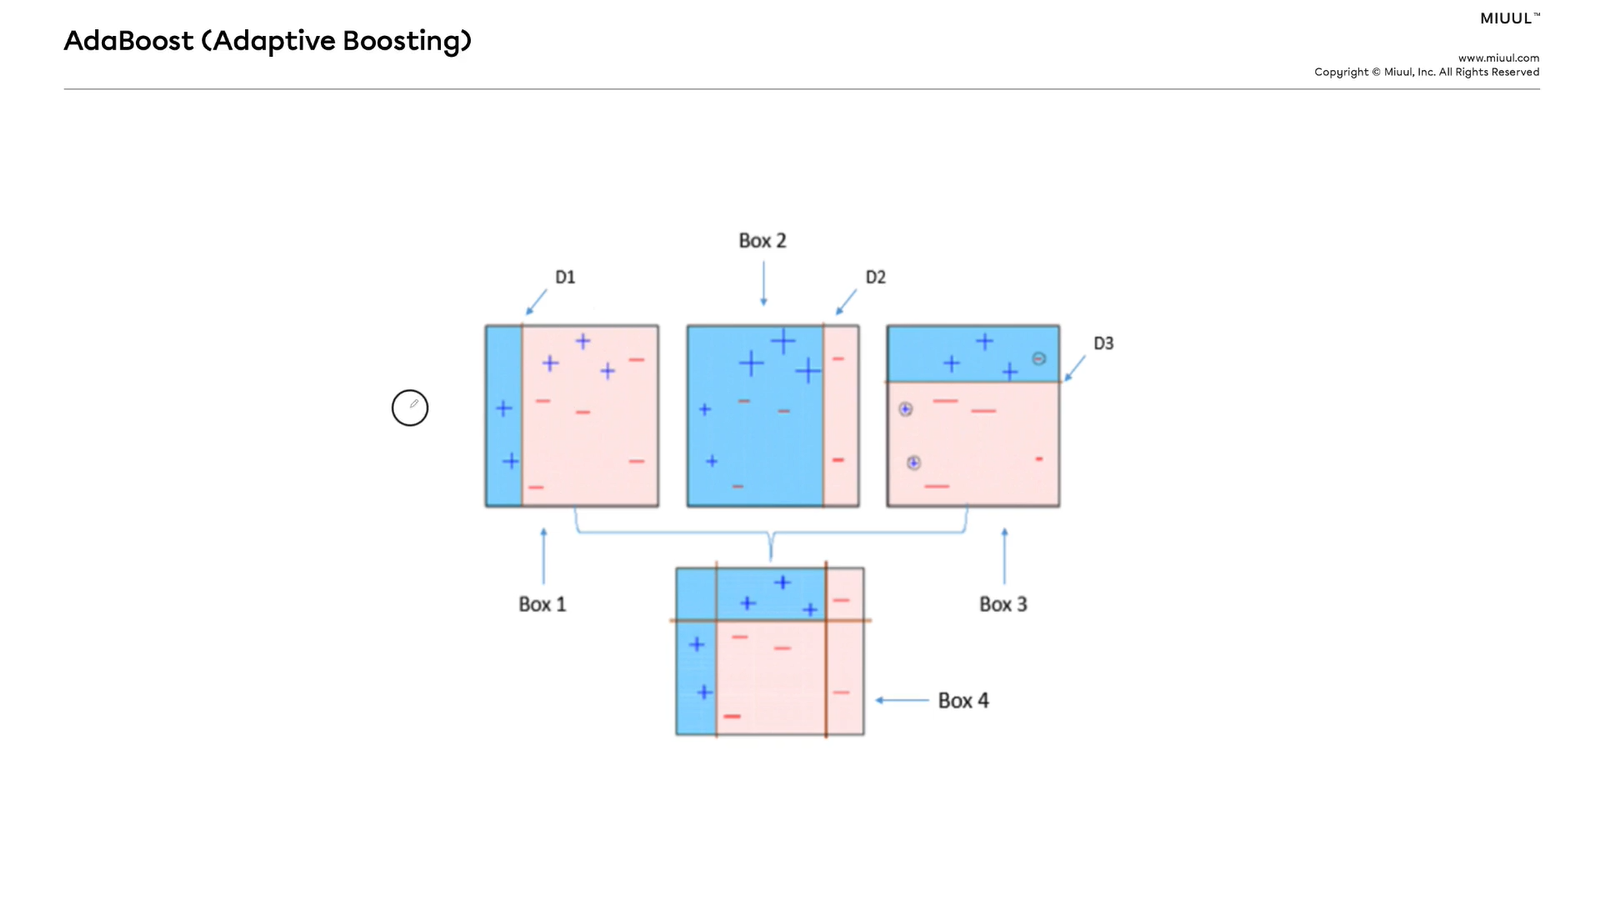

* çizgiler çekilerek hassaslaştırıyor - değerler ne kadar içinde de olsa ağırlıklar oluşturularak aza indirgeniyor.

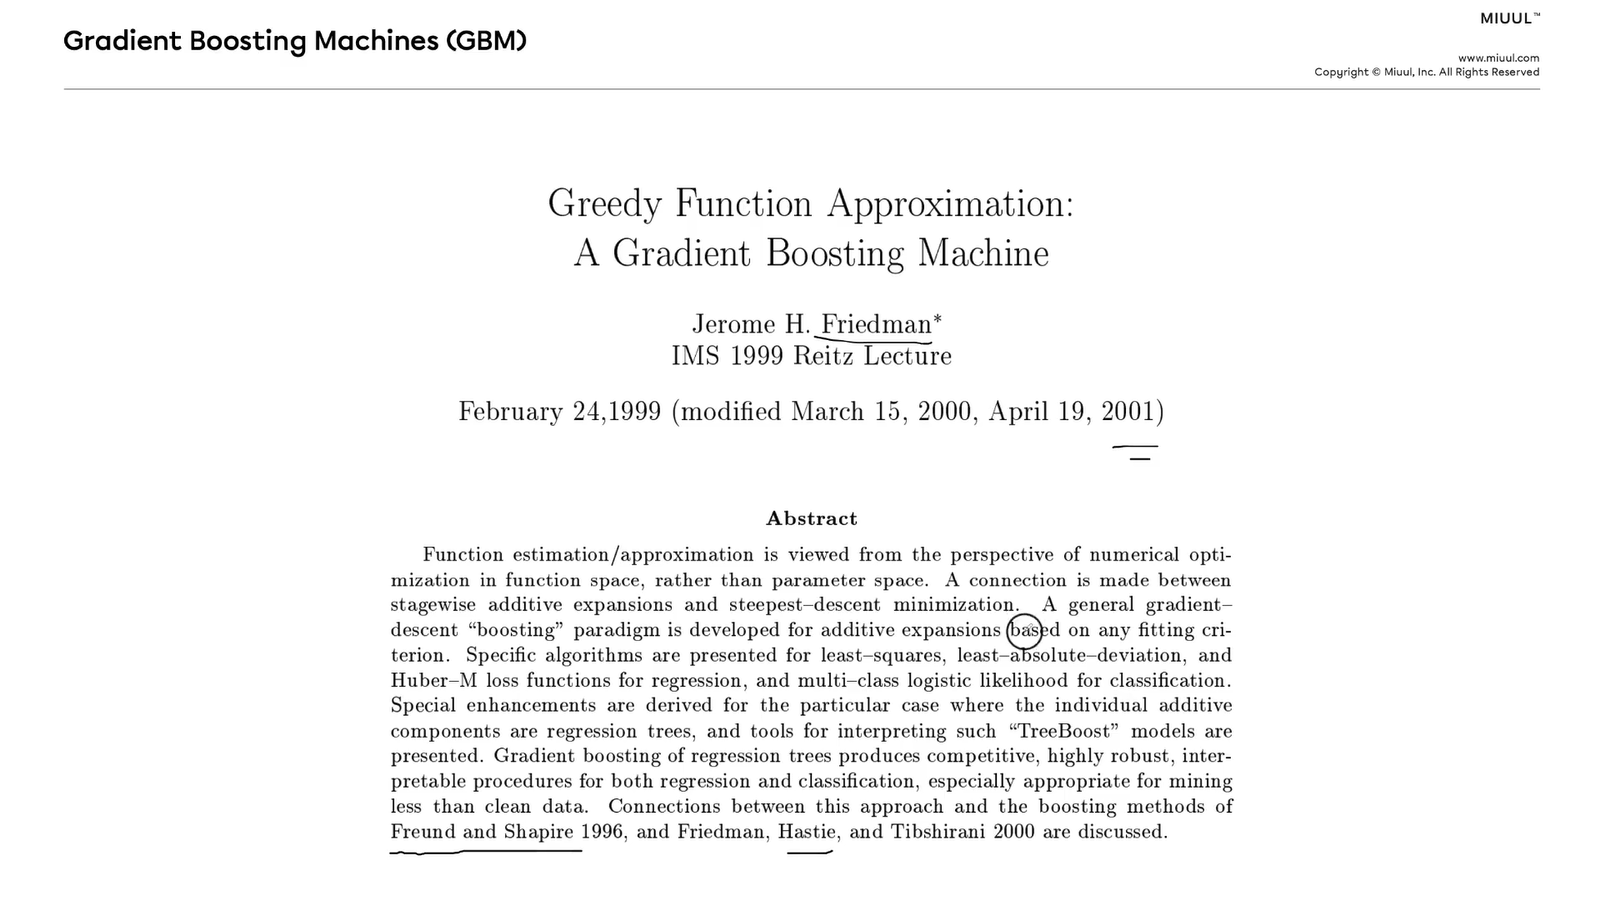

GBM 
* Boosting + Gradient Descent 
* Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur. 
* Seri içerisindeki bir model serisindeki bir önceki modelin tahmin artıklarının/hatalarının(residuals) üzerine kurularak(fit) oluşturulur. 
* GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmaktadır.
* Tek bir tahminsel model formunda olan modeller serisi additive şekilde kurulur. 

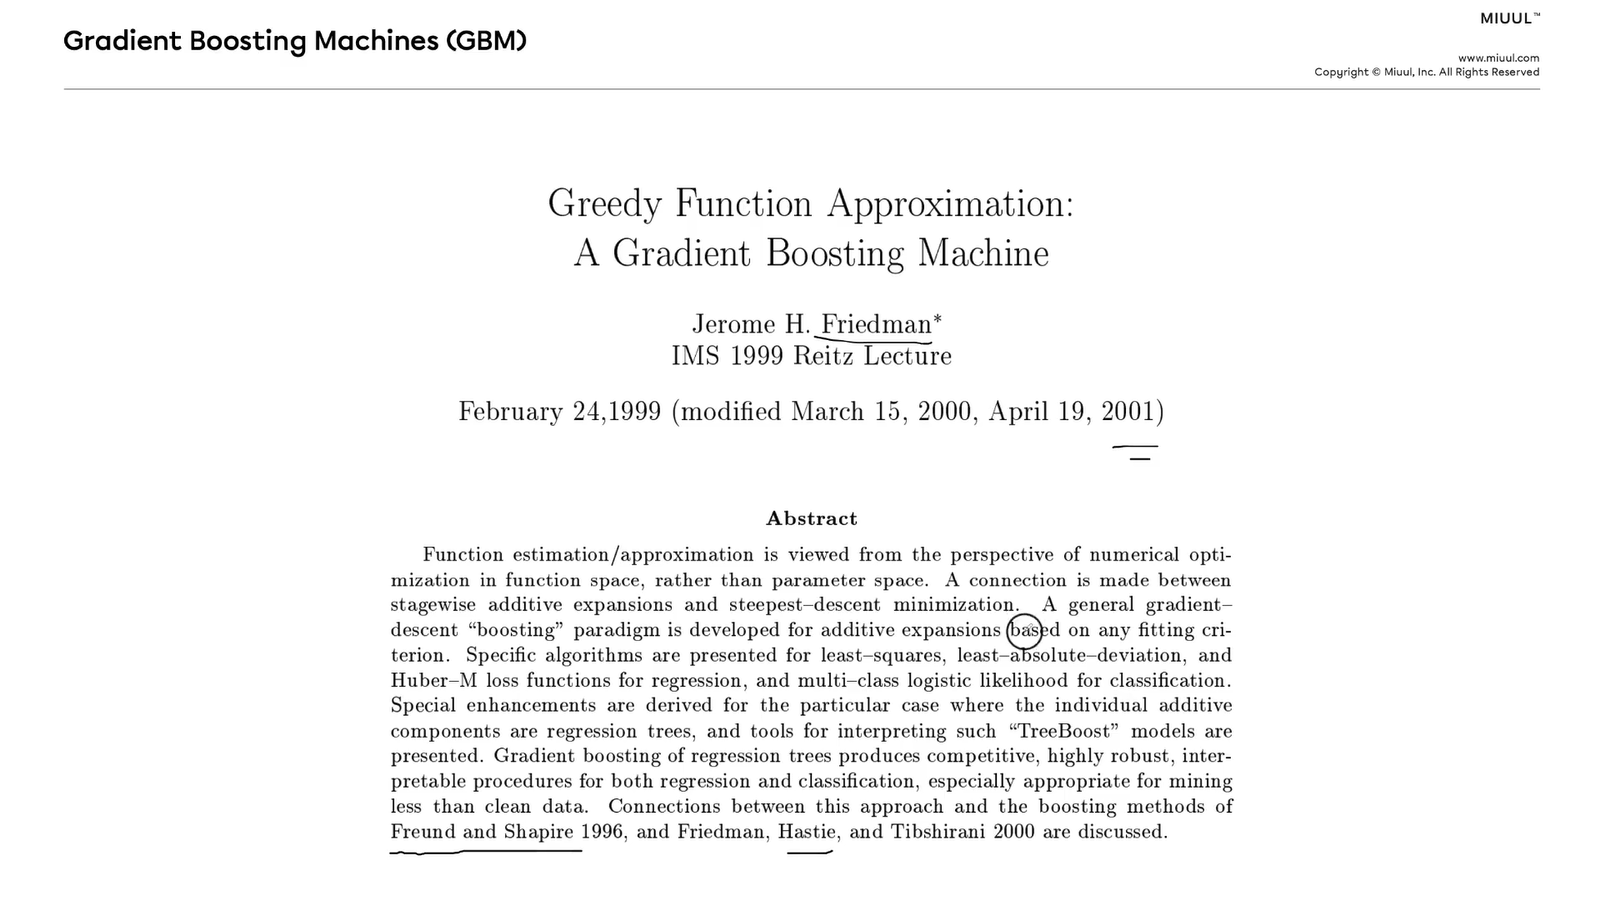

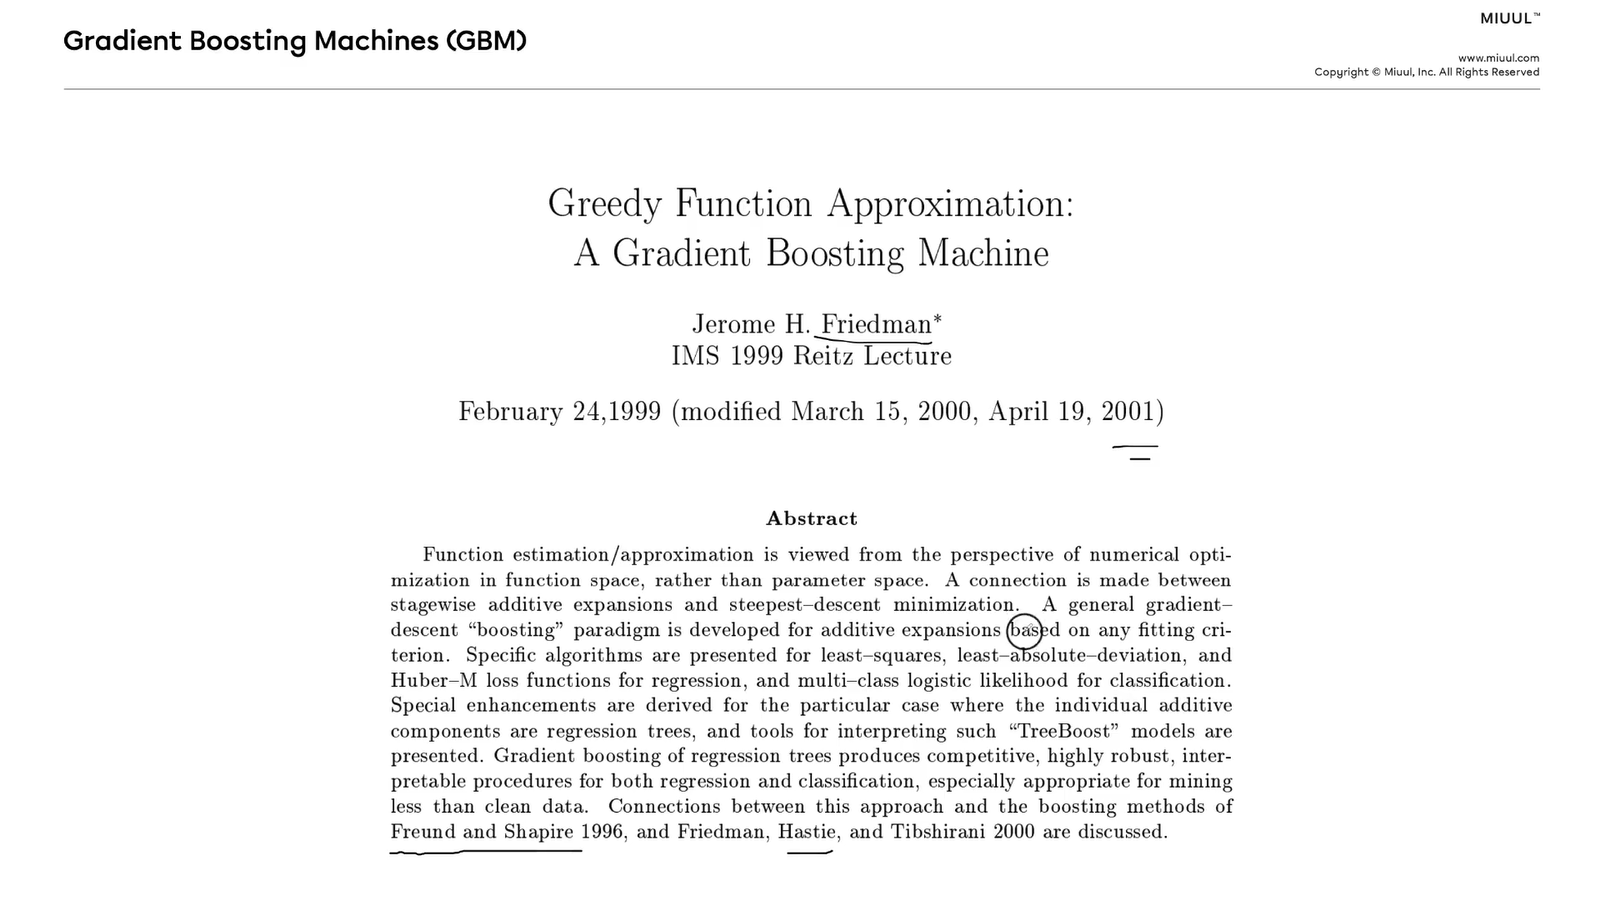

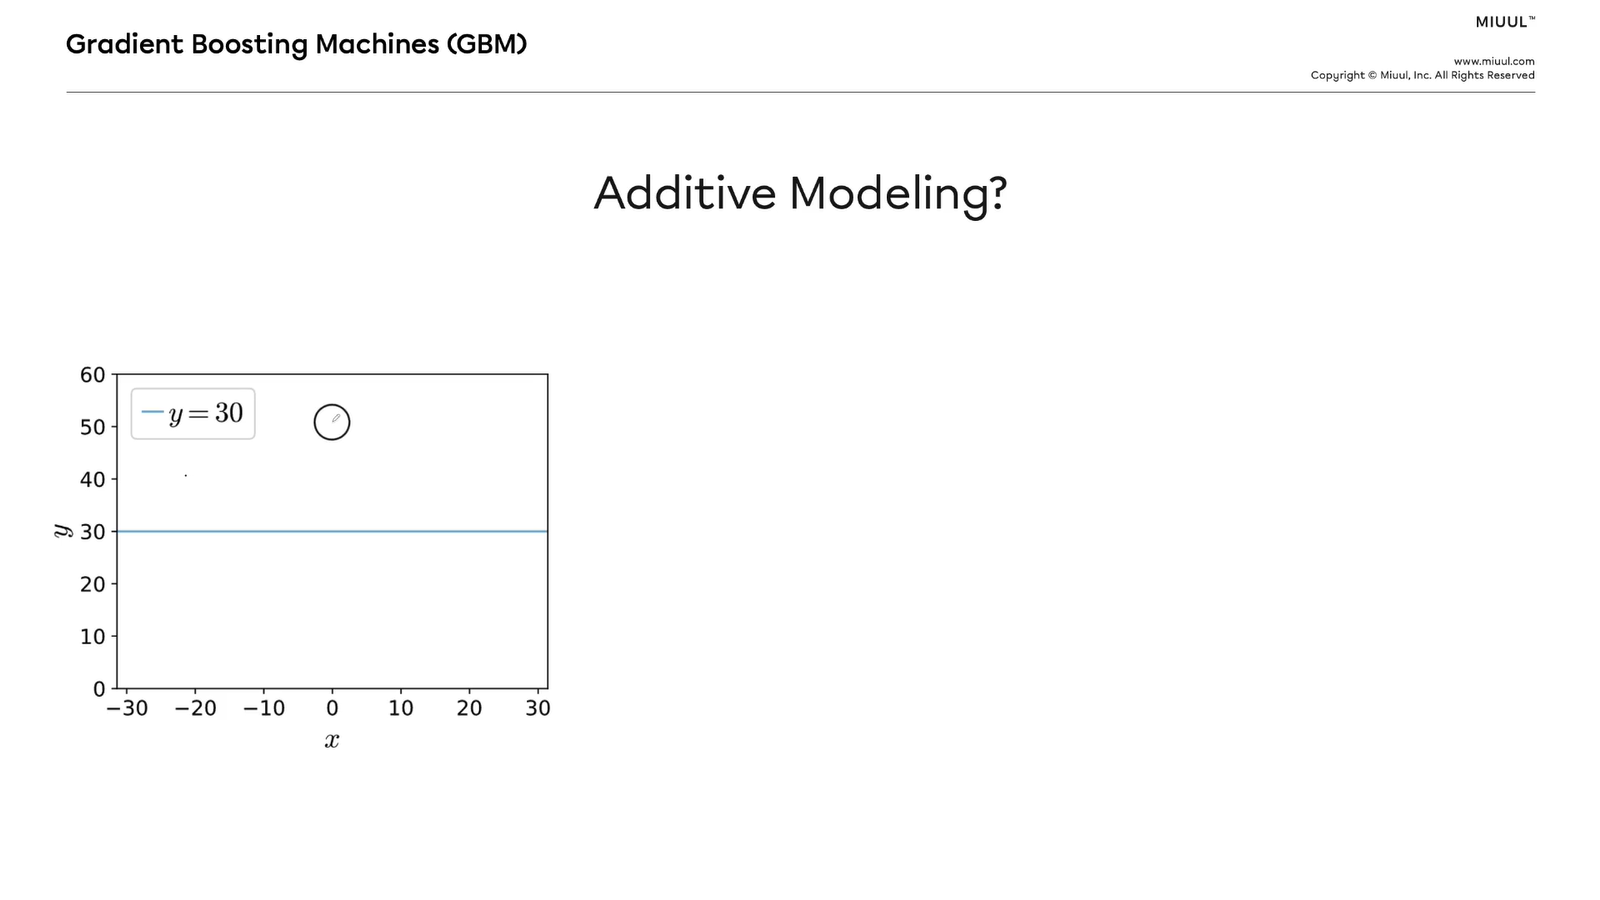

* y: sabit bunu nasıl değiştiririz? -> x'e bağlı şekilde değiştirmek istersek y= 30+x  

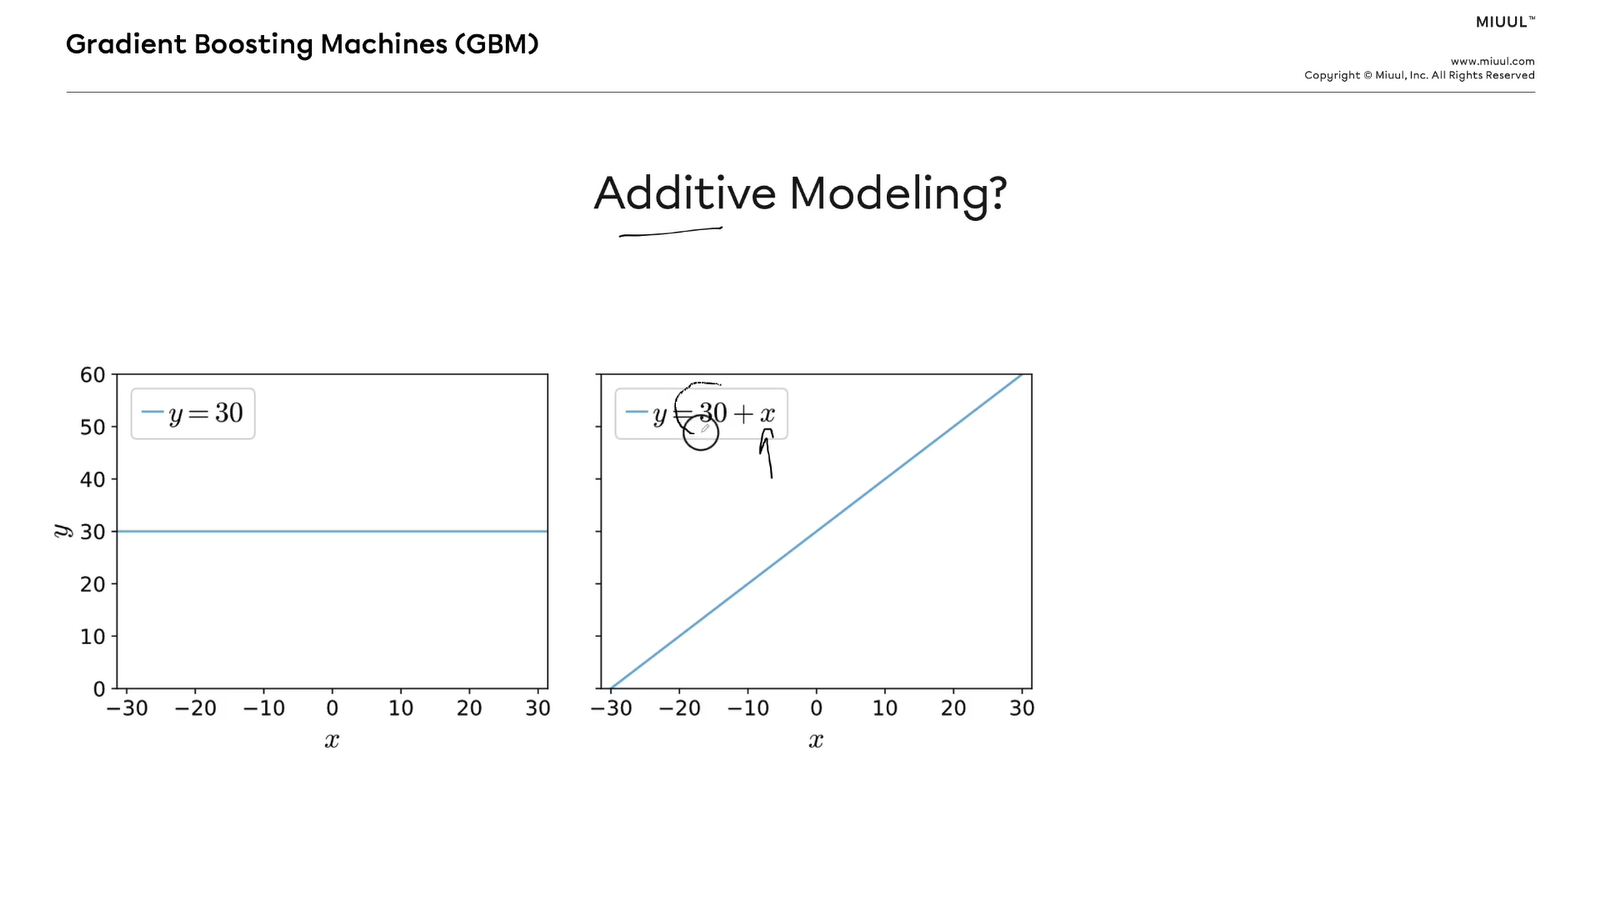

* ekleme yaptık,biçimlendirdik
* x'in etkisini daha da detaylandırmak isteriz y ye -> karesini alırız,sinx,cosx

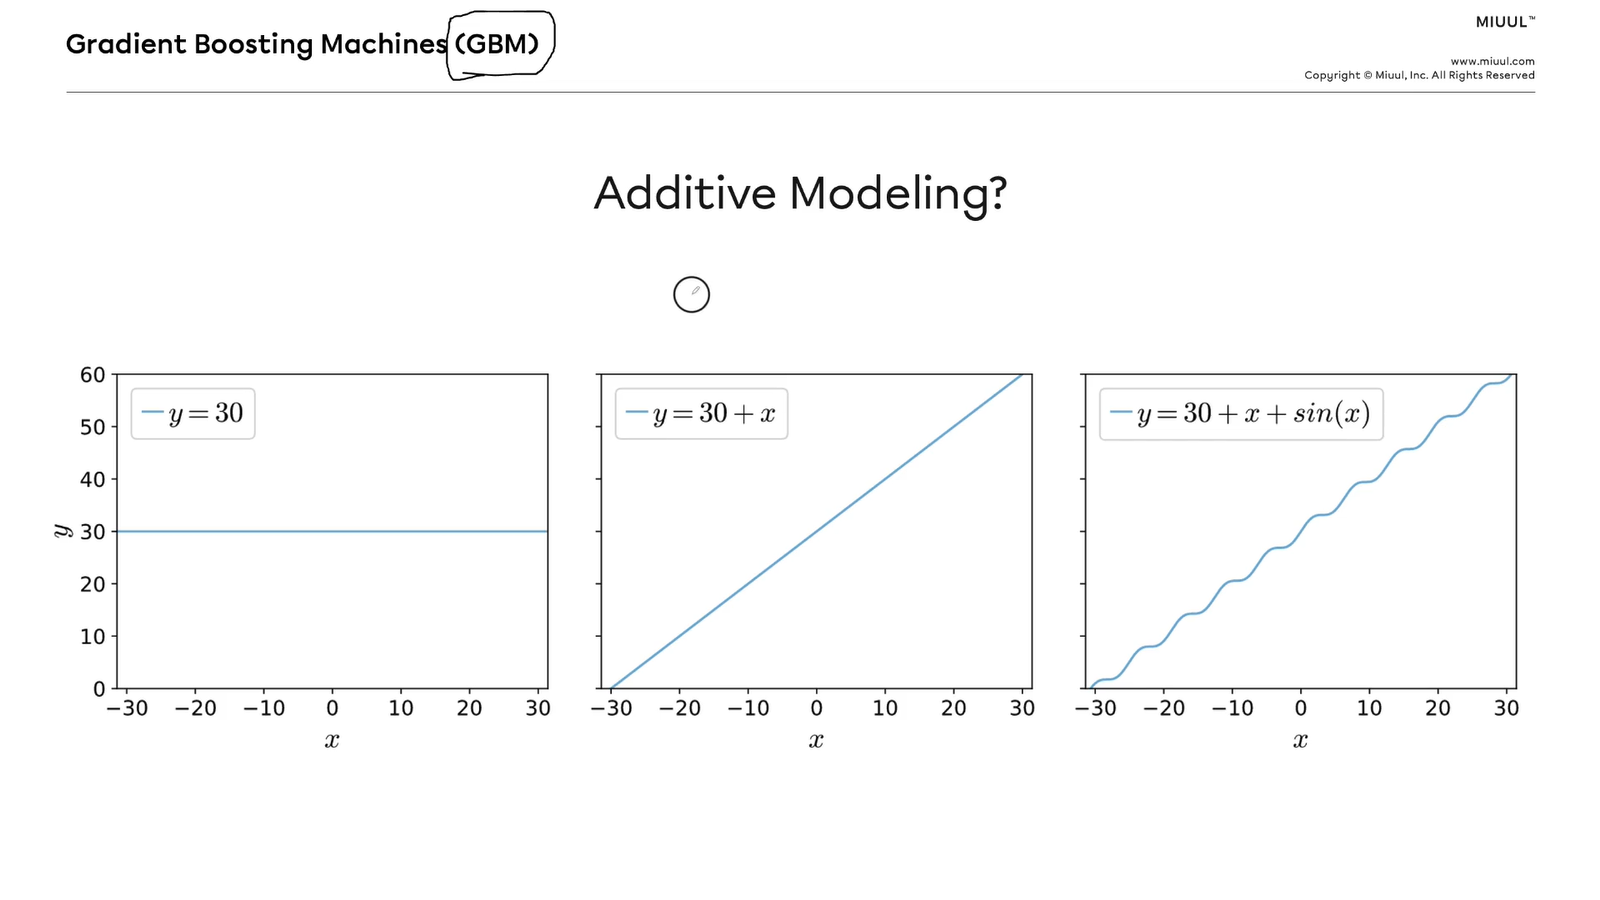

* sabit olan değere bir şekilde dokunabilir ona etki edersek ,additive modeller eklersek daha başarılı tahminler elde edebiliriz. (daha hassas yapacağız)

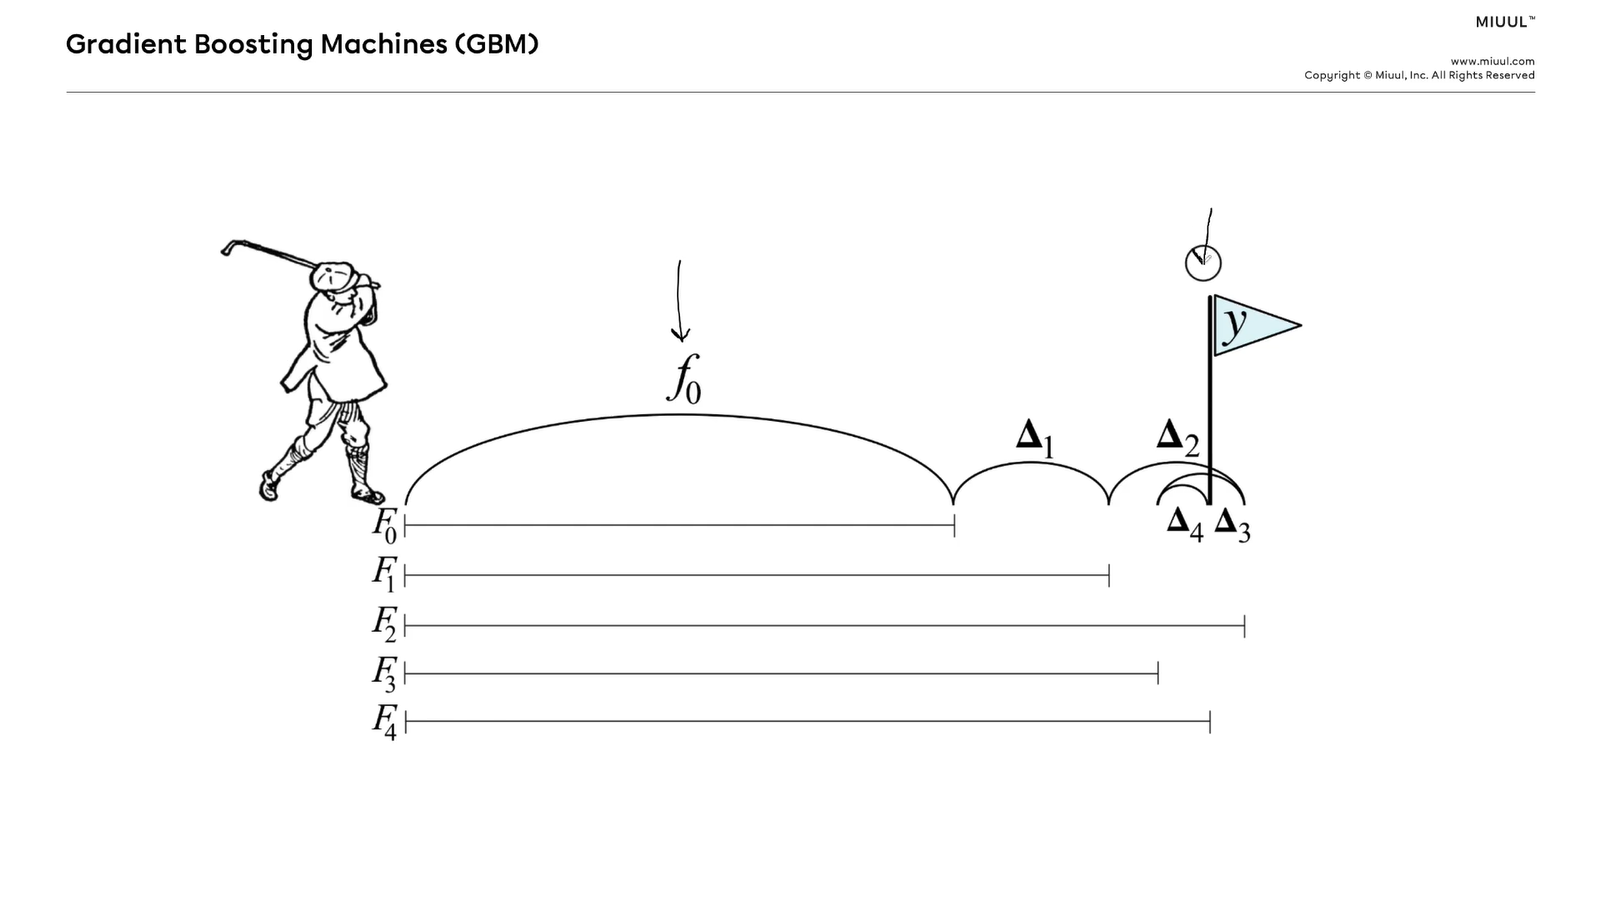

* yukarıdaki örnekte topu her attığında tahminde bulunuyor hızlı atmalıyım sola atmalıyım vs diye ve her vuruş sonrasında deliğe yaklaşıyor, veride de aynı şekilde deneyerek doğru tahmini(gerçek değerleri) yapmaktır.

Formulation
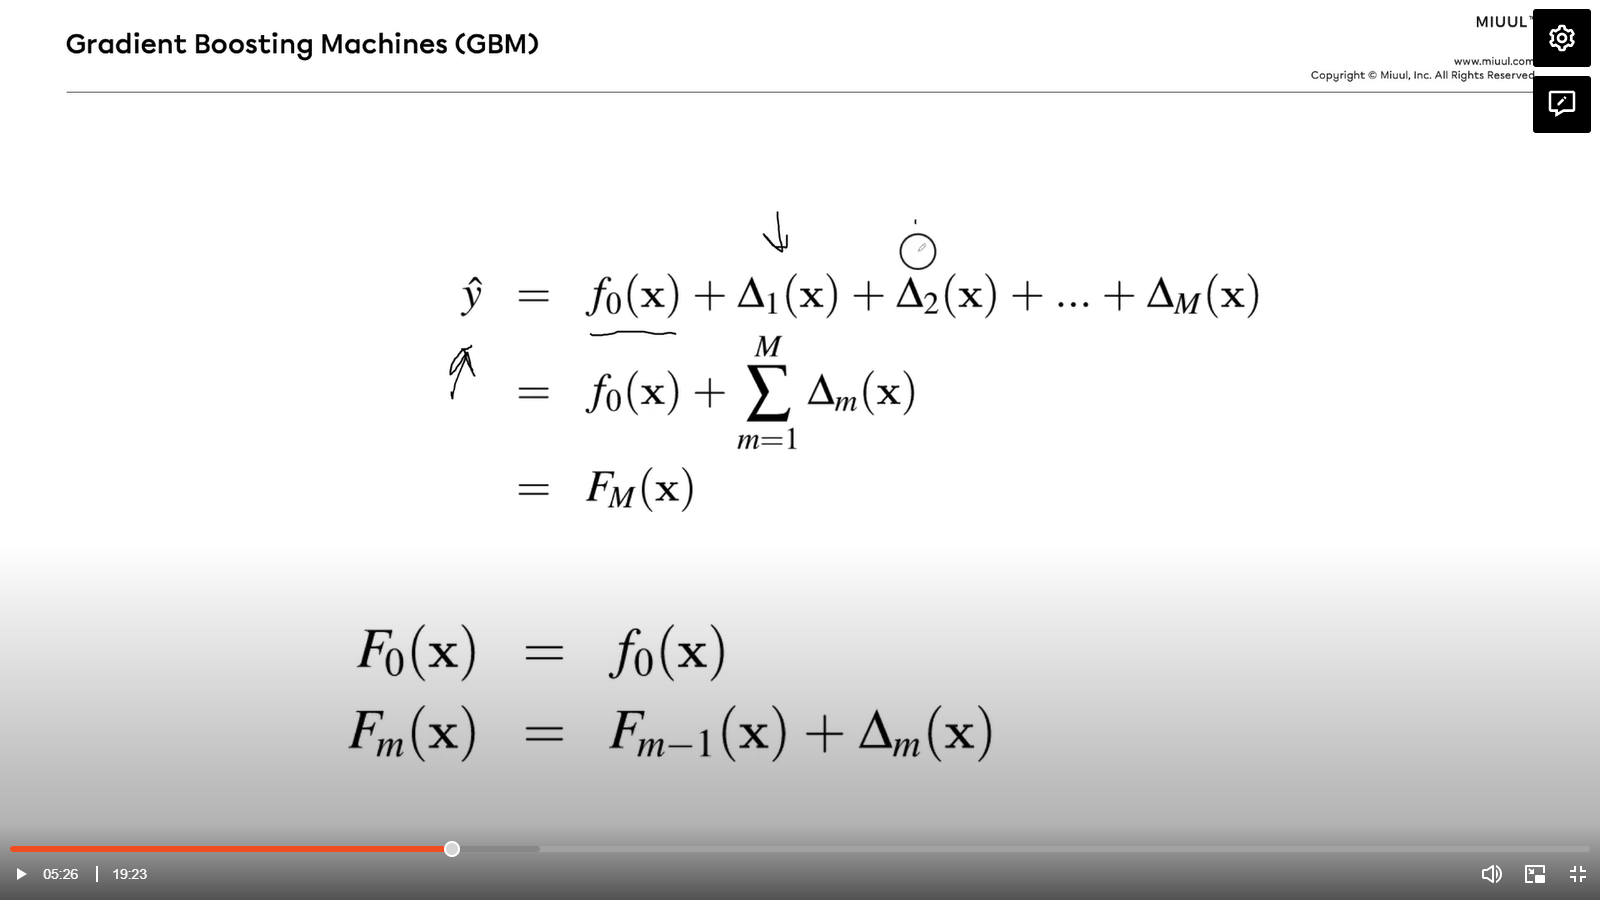

* artıklar delta 1+ delta 2 + delta 3 + .... delta m -> artıklar(gerçek - tahmin) iterasyon sayısı 
* F0(x) -> base learner model bundan sonrakiler artık modeldir.  

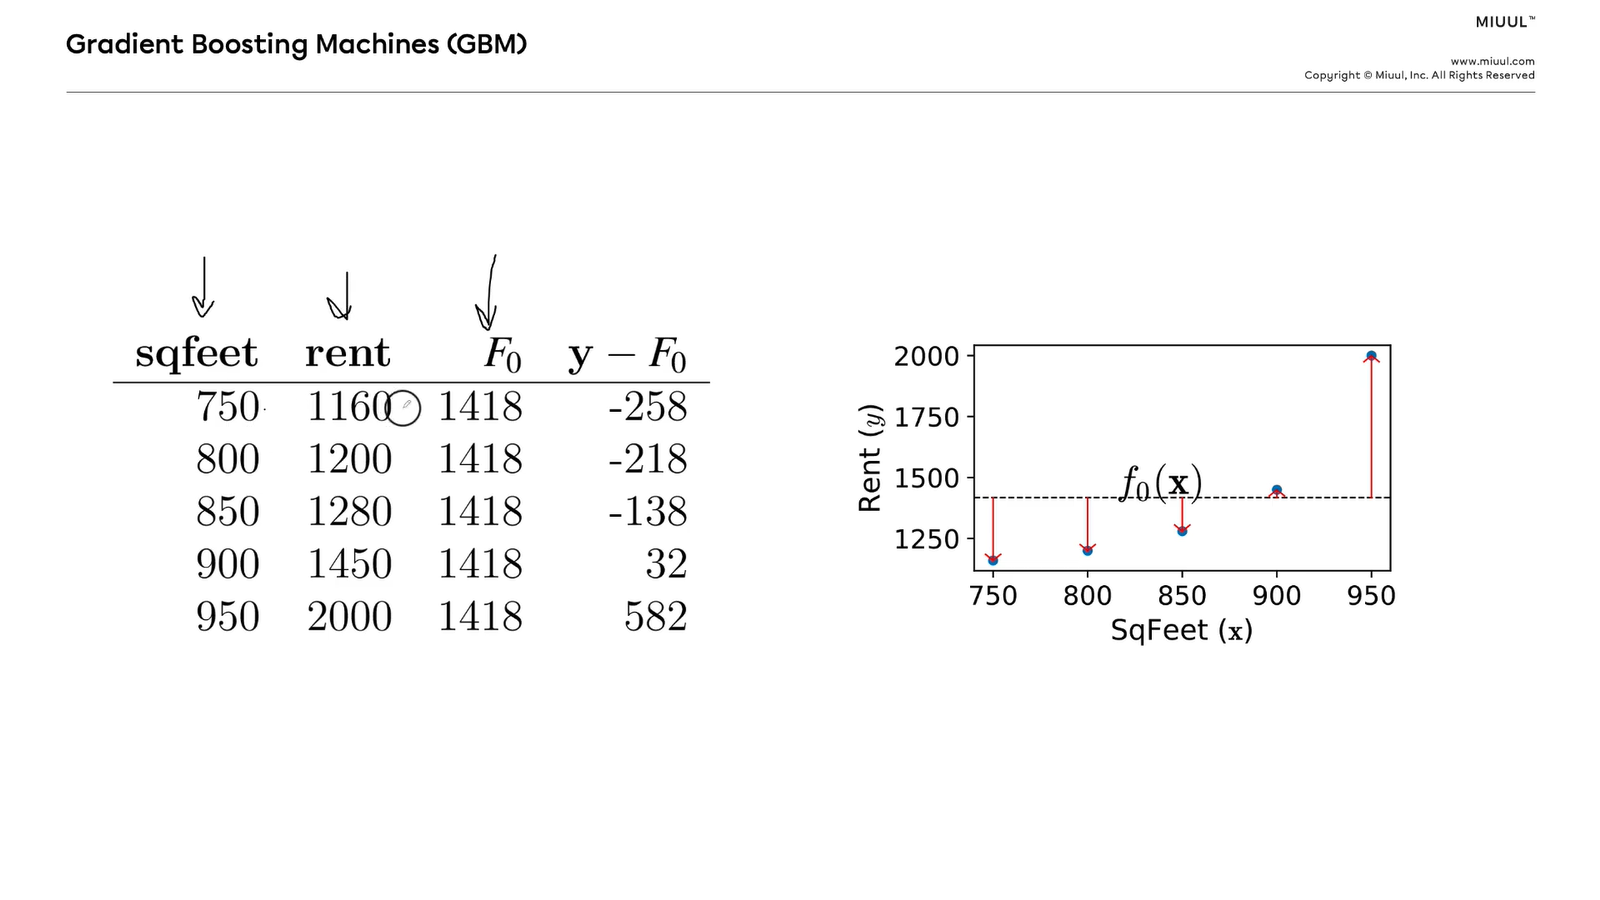

* rent(y) -> hiç bölünmeyen hali 
* F0 -> tahmin edilen değer , sabit bir fonksiyon 
* gradient descent ile eklemeler yapacağız 


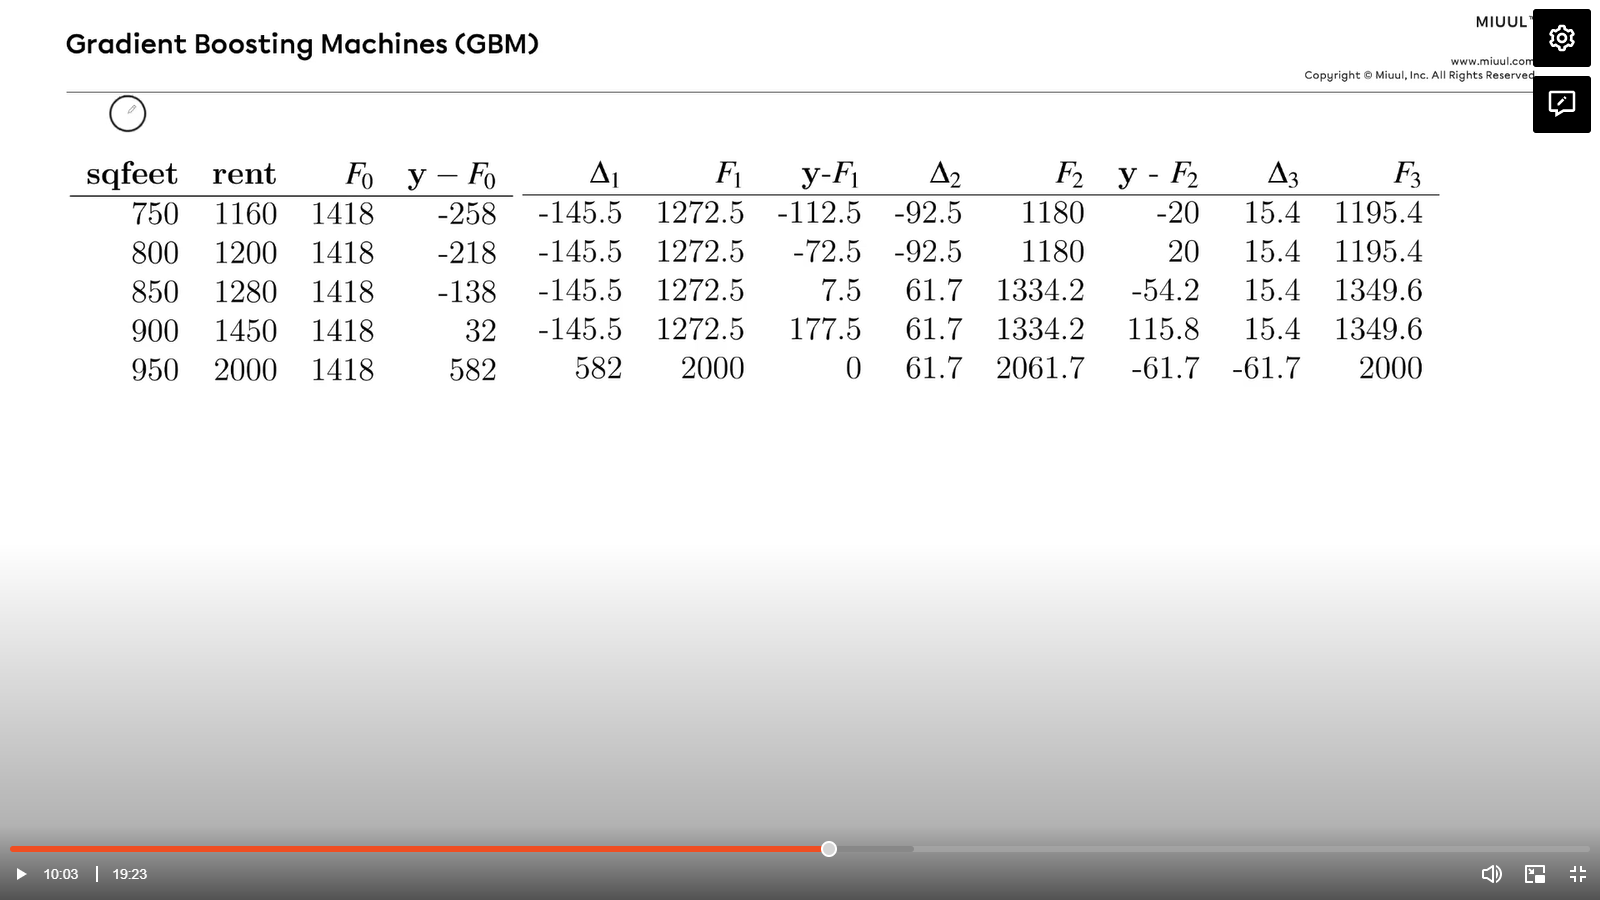

* rent: gerçek değerler
* f0 : tahmin değerler 
* sqfeet :bağımsız değişkenler 
* y-f0 : bağımlı değişken 
* delta : elde edilen sonuçlar/ortalaması 
* f1  = f0 + delta1 -> y1 şapka 
* gerçek değerler - yeni tahminler -> rent + f1 
* y - F1 -> delta 2 yi verir -> ortalama değerler 
* f2 = f1 + delta2 -> yeni tahmin edilen değer f2 dir

b -> sabit türevi : (yi - y1)xi -> aynı gibi->learning rate ile çarpıyorsun

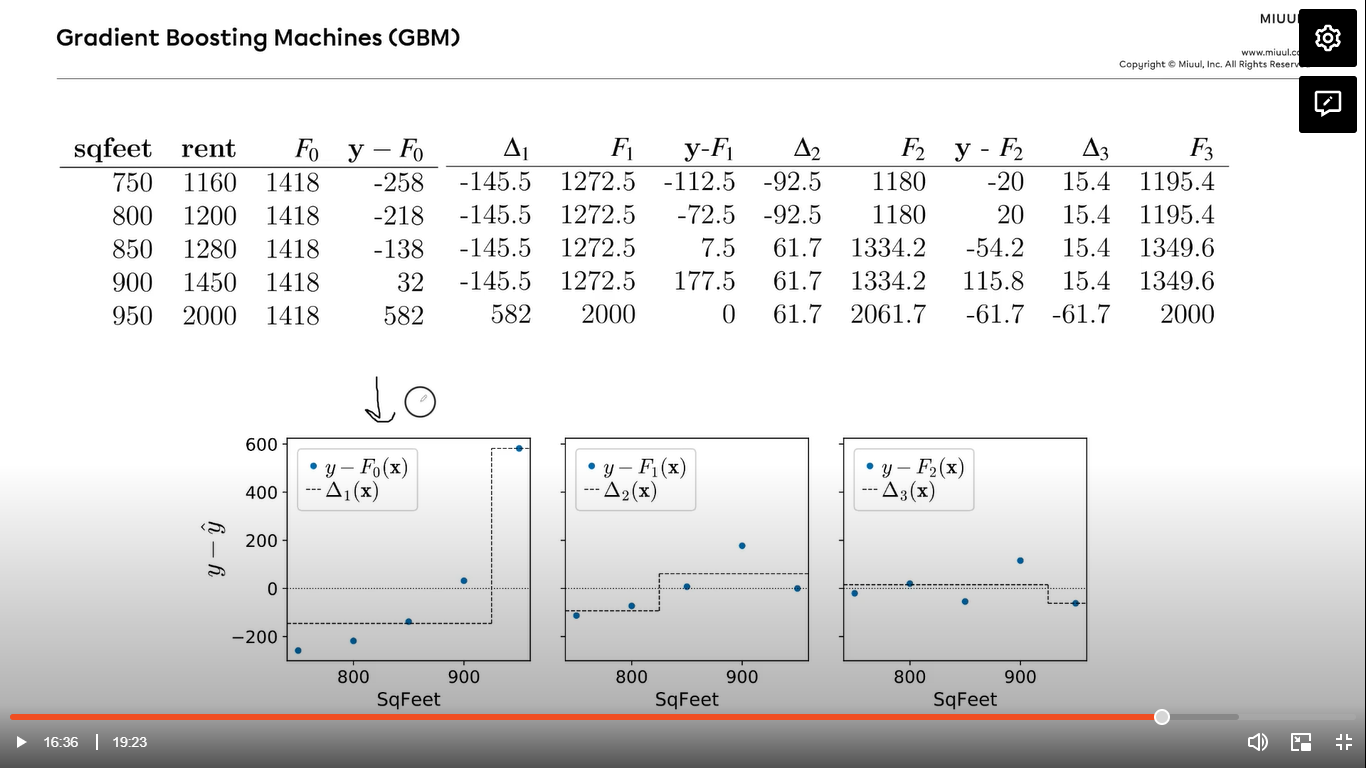

* 1.artık modeli grafik 1 de  
* dikkat edersen artıklar optimize edilerek küçültülmüş fark azalmış 

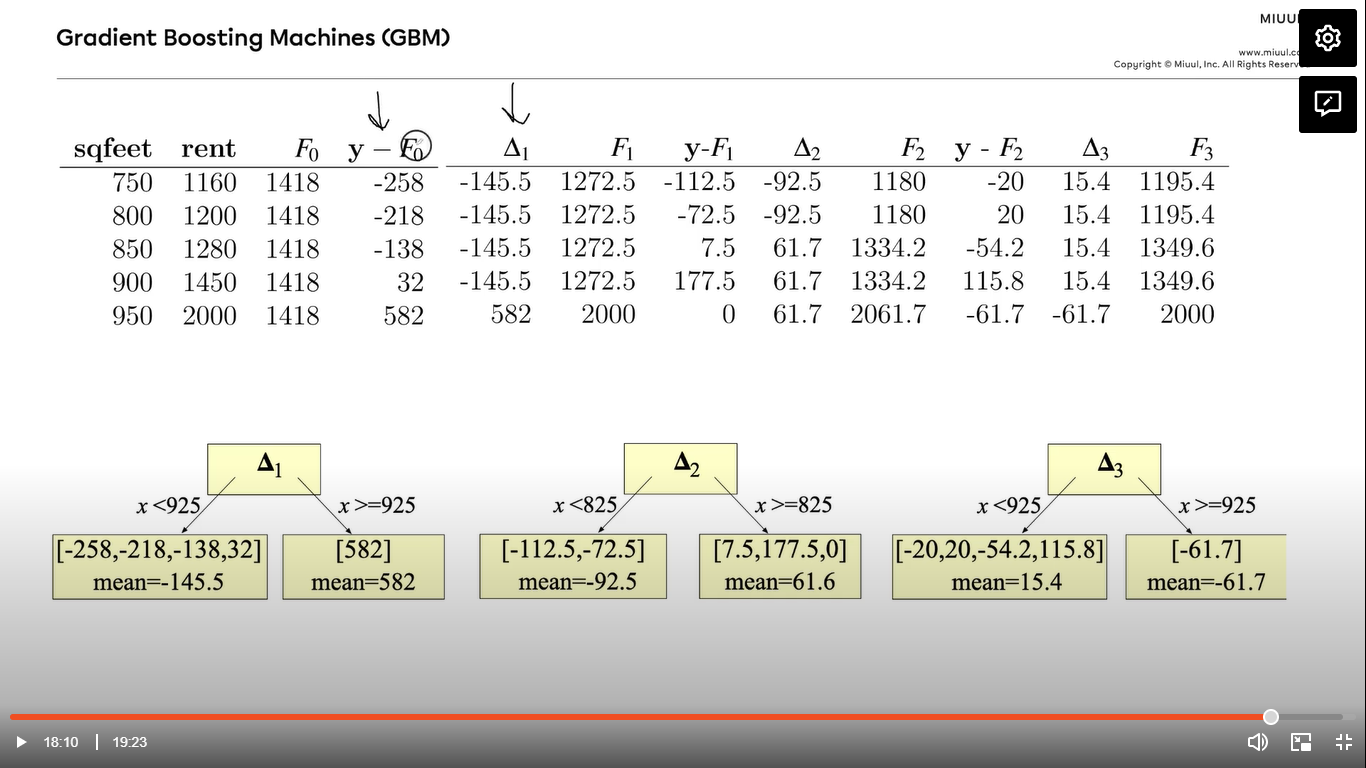

* f'ler artıklar/ bağımlı değişken 
* deltalar tahmin edilen değerler

In [30]:
gbm_model = GradientBoostingClassifier(random_state=17)

In [31]:
# önce parametreleri gözlemleyelim
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 17,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [38]:
# hatalarımız nelerdir ona bakalım

In [33]:
gbm_results = cross_validate(gbm_model,X, y, cv=10, scoring=["accuracy","f1","roc_auc"]) 

In [34]:
gbm_results['test_accuracy'].mean()

0.7630041011619959

In [36]:
gbm_results['test_f1'].mean() 

0.6414575231475813

In [37]:
gbm_results['test_roc_auc'].mean()

0.8304501424501425

In [40]:
# gbm için aranacak olan hiperparametre seti
# learning_rate -> ne kadar küçük olursa işlem o kadar uzun sürer fakat başarı oranı artar.

In [42]:
gbm_params = { "learning_rate": [0.01,0.1],
               "max_depth": [3,8,10],
               "n_estimators": [100,500,1000],
               "subsample": [1,0.5,0.7],
               }

In [43]:
gbm_best_grid = GridSearchCV(gbm_model,gbm_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [44]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_,random_state = 17).fit(X,y)

In [45]:
gbm_final

GradientBoostingClassifier(max_depth=8, random_state=17, subsample=0.5)

In [46]:
# final modelini değerlendirelim

In [47]:
gbm_results = cross_validate(gbm_final,X,y, cv=5,scoring=["accuracy","f1","roc_auc"]) 

In [48]:
gbm_results['test_accuracy'].mean()

0.7800186741363212

In [51]:
gbm_results['test_f1'].mean()

0.668605747317776

In [53]:
gbm_results['test_roc_auc'].mean()

0.8257784765897973

# XGBoost (eXtrem Gradient Boosting)

Nedir? 
* GBM'in hız ve tahmin peerformansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir versiyonudur. 
* Tianqi Chen 2014

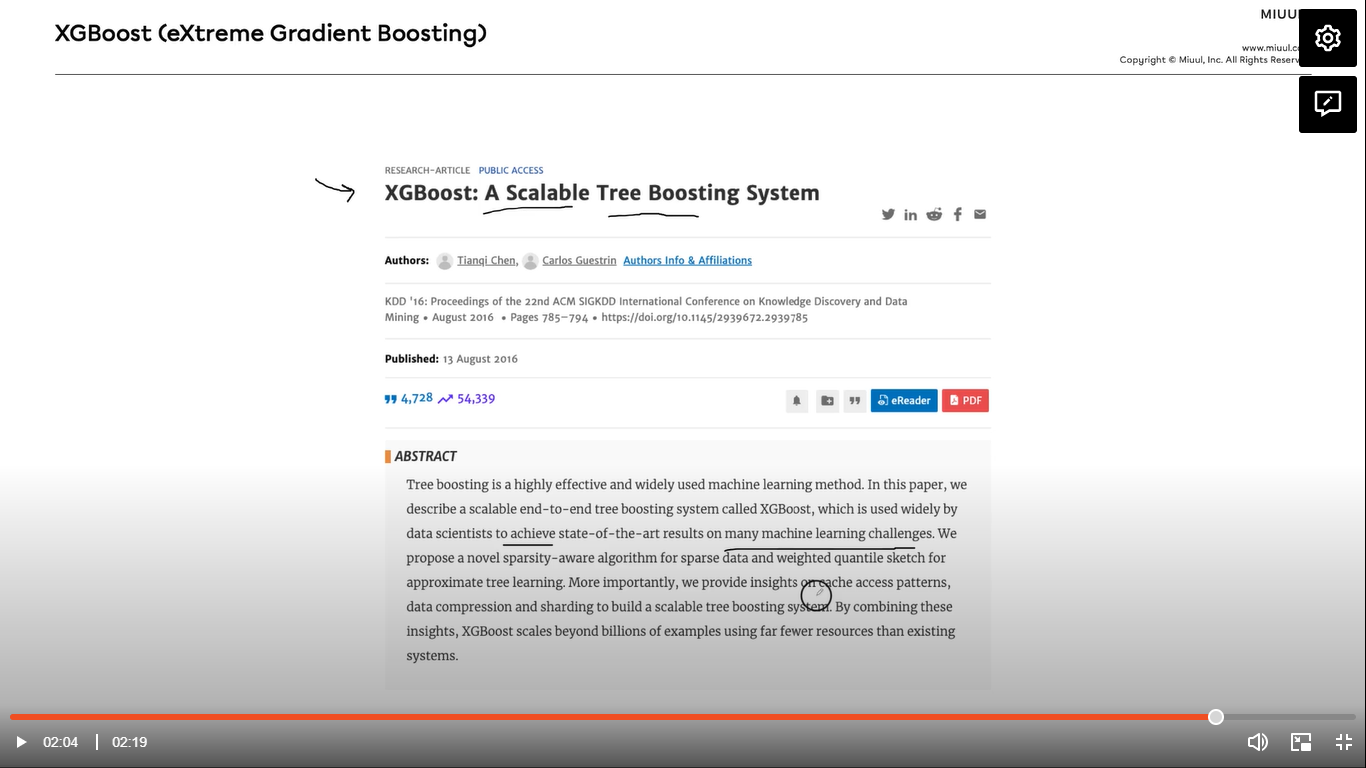

In [54]:
xgboost_model = XGBClassifier(random_state=17)

In [55]:
xgboost_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 17,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [57]:
cv_results = cross_validate(xgboost_model,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])

In [58]:
cv_results['test_accuracy'].mean() 

0.7526525761819879

In [59]:
cv_results['test_f1'].mean()

0.6317893713482235

In [60]:
cv_results['test_roc_auc'].mean()

0.7987134870719776

In [64]:
xgboost_params = { "learning_rate": [0.1,0.01,0.001], 
                   "max_depth": [5,8,None], 
                   "n_estimators": [100,500,1000], 
                   "colsample_bytree": [None,0.7,1]   # xgboost colsample_bytree : gözlem sayısı             
                 }

In [66]:
xgboost_best_grid = GridSearchCV(xgboost_model,xgboost_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [67]:
# final modeli kuralım 

In [68]:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_,random_state=17).fit(X,y)

In [73]:
xgboost_final.set_params()

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=17,
              reg_alpha=0, reg_lambda=1, ...)

In [69]:
cv_results = cross_validate(xgboost_final,X,y,cv=5,scoring=["accuracy","f1","roc_auc"]) 

In [70]:
cv_results['test_accuracy'].mean()

0.7618029029793736

In [71]:
cv_results['test_f1'].mean()

0.6088549049333302

In [72]:
cv_results['test_roc_auc'].mean()

0.8194884696016771

# Light GBM

Nedir ? 
* XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür. 
* Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi ile daha hızlıdır. ->  Xgboost geniş kapsamlı arama yaparken, LightGbm derinlemesine ilk arama yapmaktadır.
* Microsoft 2017

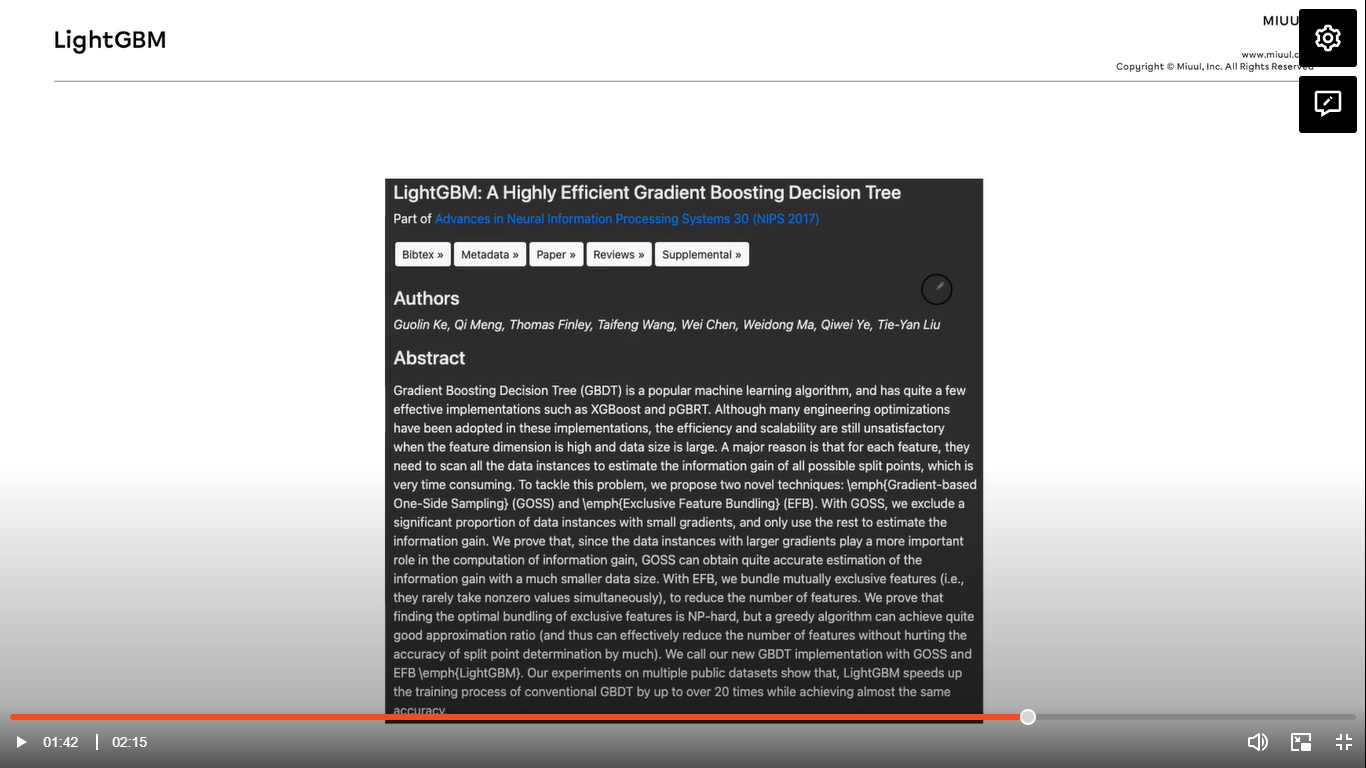

In [74]:
lgbm_model = LGBMClassifier(random_state=17) 
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [75]:
cv_results = cross_validate(lgbm_model,X,y,cv=5, scoring=["accuracy","f1","roc_auc"]) 

In [76]:
cv_results['test_accuracy'].mean()

0.7474492827434004

In [77]:
cv_results['test_f1'].mean()

0.624110522144179

In [78]:
cv_results['test_roc_auc'].mean()

0.7990293501048218

In [80]:
# hiperparametre setini girelim 
# adım adım tüm süreci görmek için random forest kullanılır 
# pratik anlamda light gbm kullanır nedeni ise daha hızlı 

In [81]:
lgbm_params = {"learning_rate":[0.01,0.1,0.001], 
               "n_estimators": [100,300,500,1000],
               "colsample_bytree": [0.5,0.7,1]
              }

In [86]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_,random_state = 17).fit(X,y) 

In [87]:
cv_results = cross_validate(lgbm_final,X,y,cv=5, scoring=["accuracy","f1","roc_auc"]) 

In [88]:
cv_results['test_accuracy'].mean()

0.7643578643578645

In [89]:
cv_results['test_f1'].mean()

0.6372062920577772

In [90]:
cv_results['test_roc_auc'].mean()

0.8147491264849755

In [91]:
# benzer işlem yaparsak nasıl sonuç elde ederiz değerleri değiştir ve dene 

# CatBoost

Nedir ? 
* Kategorik değişkenler ile otomatik olarak mücadele edebilen , hızlı, başarılı, bir diğer GBM türevi
* Yandex 2017 

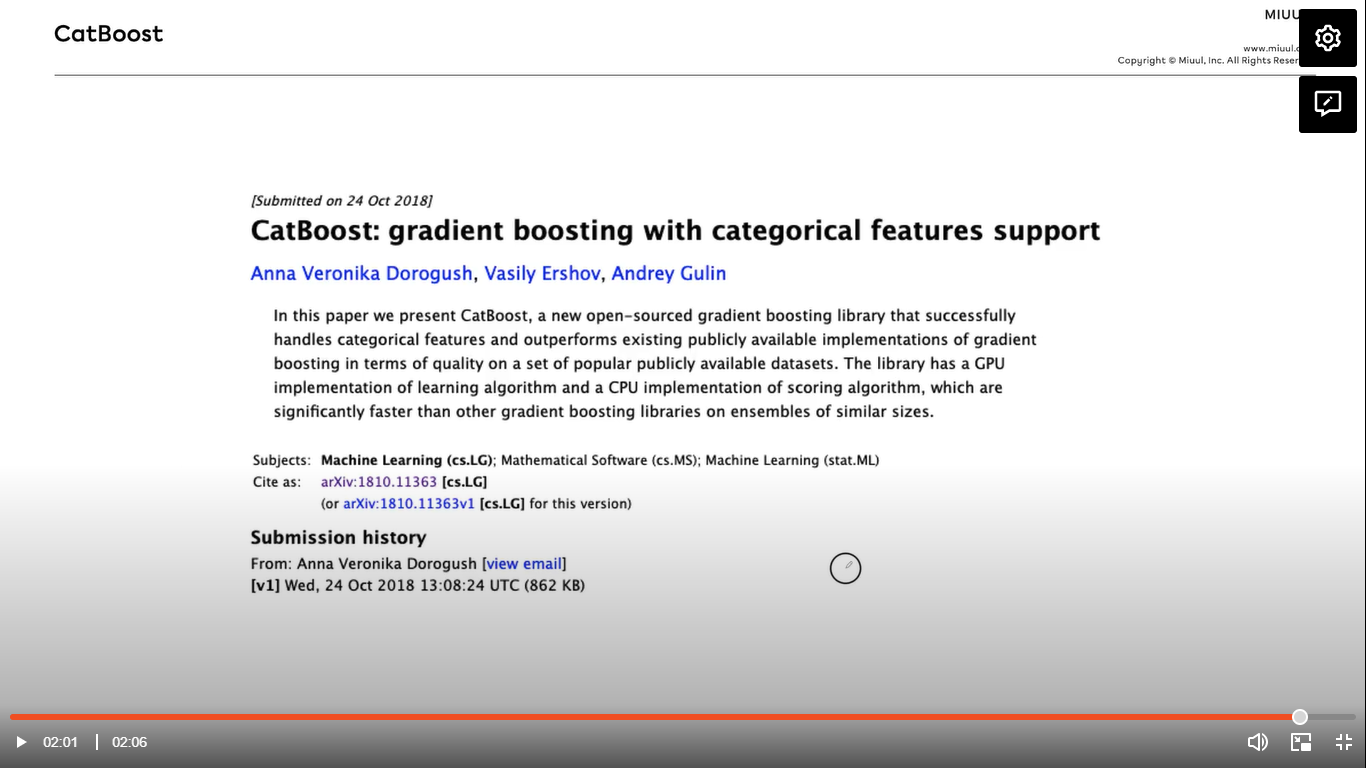

In [92]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

In [94]:
catboost_model.get_params

<bound method CatBoost.get_params of <catboost.core.CatBoostClassifier object at 0x000002679492AE50>>

In [95]:
cv_results = cross_validate(catboost_model,X,y,cv=5,scoring=["accuracy","f1","roc_auc"]) 

In [96]:
cv_results['test_accuracy'].mean() 

0.7735251676428148

In [97]:
cv_results['test_f1'].mean()

0.6502723851348231

In [98]:
cv_results['test_roc_auc'].mean()

0.8378923829489867

In [102]:
catboost_params = {"iterations":[200,500], 
               "learning_rate": [0.01,0.1],
               "depth": [3,6]
              }

In [103]:
catboost_best_grid = GridSearchCV(catboost_model,catboost_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [104]:
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_,random_state=17).fit(X,y)

In [105]:
catboost_best_grid.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.01}

In [106]:
cv_results = cross_validate(catboost_final, X,y, cv=5,scoring=["accuracy","f1","roc_auc"]) 

In [107]:
cv_results['test_accuracy'].mean()

0.7721755368814192

In [108]:
cv_results['test_f1'].mean()

0.6322580676028952

In [109]:
cv_results['test_roc_auc'].mean()

0.842001397624039

# Feature Importance

In [110]:
def plot_importance(model, features, num=len(X), save = False): 
    feature_imp = pd.DataFrame({'Value':model.feature_importances_, 'Feature':features.columns}) 
    plt.figure(figsize=(10,10)) 
    sns.set(font_scale = 1)  
    # sort_values ile küçükten büyüğe sıralıyoruz sonra barplot ile görselleştiriyoruz
    sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value", 
                                                                   ascending=False)[0:num]) 
    # num argümanı değişken sayısı kadar değer taşı demek istiyor 
    # kaydetmek istersek "save"  true dersek kaydeder.
    
    plt.title('Features') 
    plt.tight_layout() 
    plt.show() 
    if save: 
        plt.savefig('importances.png')

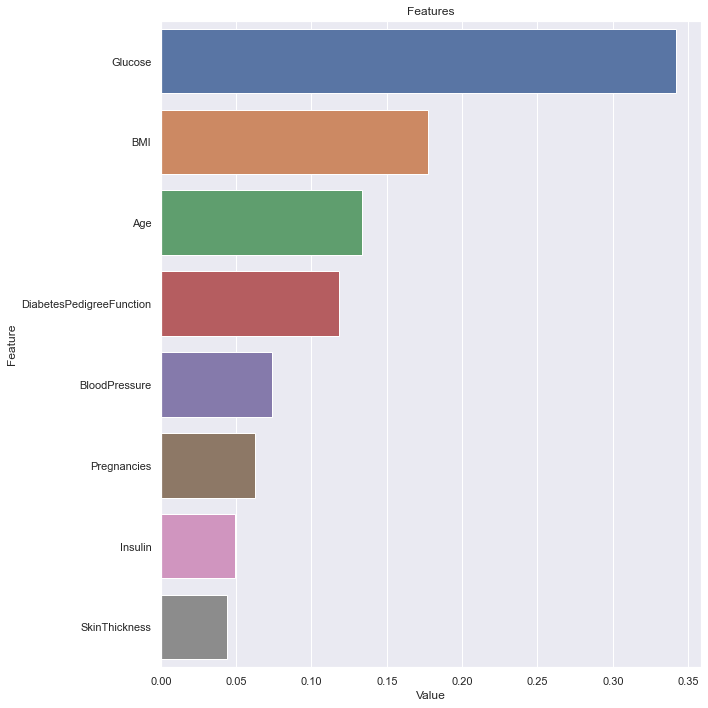

In [111]:
# random forest
plot_importance(rf_final,X)

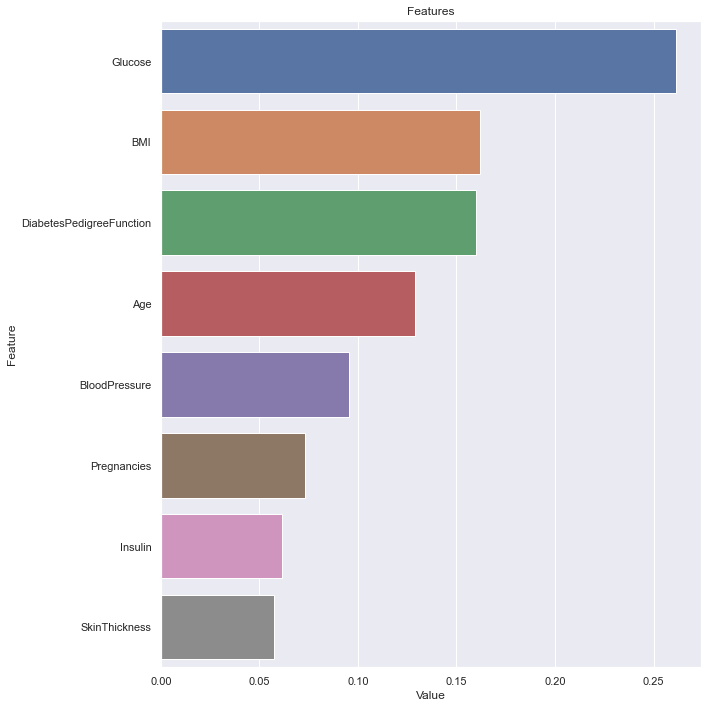

In [113]:
# gbm 
plot_importance(gbm_final,X)

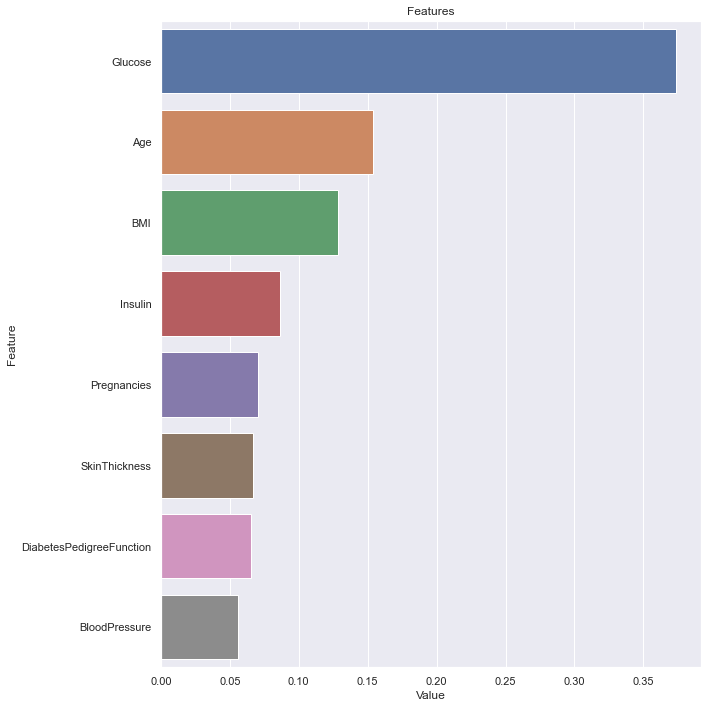

In [114]:
# xgboost 
plot_importance(xgboost_final,X)

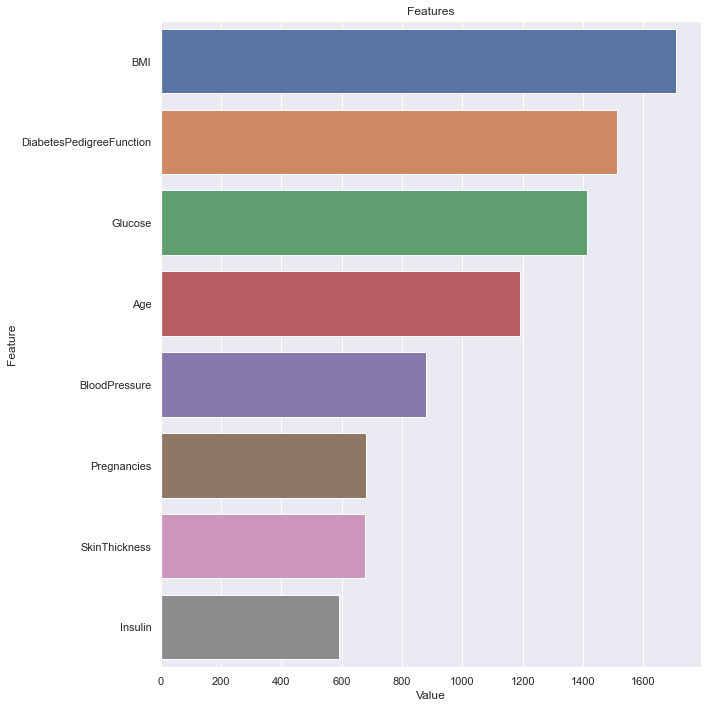

In [115]:
# lgbm 
plot_importance(lgbm_final,X)

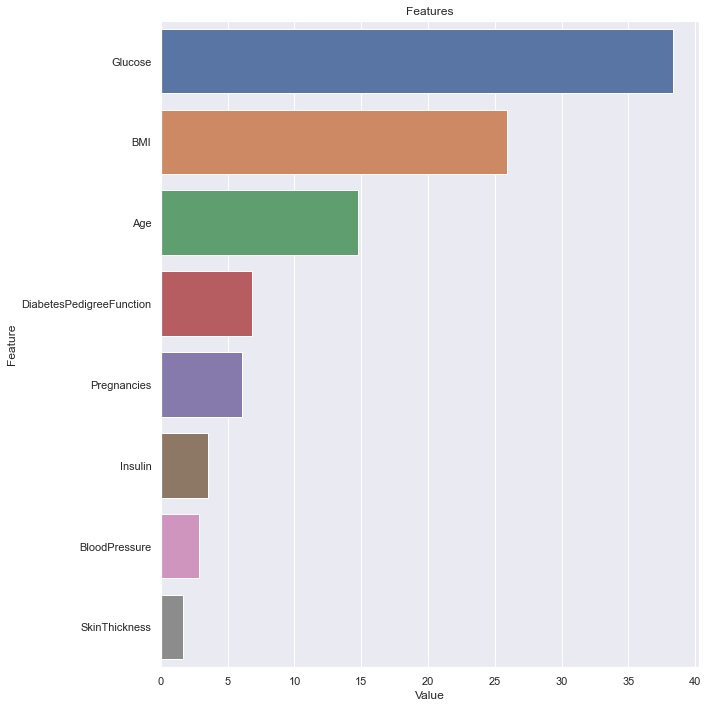

In [116]:
#catboost
plot_importance(catboost_final,X)

In [118]:
# light_gbm'de ilk 3 veri setinin değişkenleri değişti,neden ? 
# -> ? https://neptune.ai/blog/lightgbm-parameters-guide#:~:text=You%20should%20be%20aware%20that%20for%20small%20datasets   
# Bazı algoritmaların tam performansını almamız ve daha etkin kararlar verebilmemiz için belirli bir feature ve dataseti boyutu sayısını geçmesi gerekiyor. Değişme sebebi, lightgmb'in mimarisiyle alakalı.
#Bir yöntem HER ŞEY için mükemmel olamaz. Örneğin son model spor bir araba ile offroad yapamazsın. LightGBM'in en iyi modellerden birisi olması, her boyutta veri seti ile mükemmel çalışacağı anlamına gelmez.
# O sebepten ötürü, çıkacağın yola göre aracı değiştirmen gerekebilir.

# RandomSearchCV

Nedir ?  
* hiperparametreler içerisinden rastgele seçimler yapar ve rastgele arar

In [119]:
rf_model = RandomForestClassifier(random_state=17)

In [120]:
rf_random_params = {"max_depth": np.random.randint(5,50,10), 
                    "max_features": [3,5,7,"auto","sqrt"], 
                   "min_samples_split":np.random.randint(2,50,20), 
                   "n_estimators":[int(x) for x in np.linspace(start=200,stop=1500, num=10)]}

In [121]:
# gidilecek yönü ve algoritmayı bilmiyorsanız önce yelpazeyi geniş tutan randomsearchcv kullanılır sonra 
# çıkacak değerlere göre gridsearch yapılır

In [122]:
rf_random = RandomizedSearchCV(estimator=rf_model, 
                              param_distributions=rf_random_params, 
                              n_iter=100, #denenecek parametre sayısı
                              cv=3, 
                              verbose=True, 
                              random_state=42, 
                              n_jobs=-1)

In [123]:
rf_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=17),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([23, 14, 10, 15, 30, 16, 38, 17, 46, 32]),
                                        'max_features': [3, 5, 7, 'auto',
                                                         'sqrt'],
                                        'min_samples_split': array([27,  3,  6, 25, 43, 35, 10, 28,  5, 35, 16, 19, 37, 41, 20, 36, 46,
       11,  2, 39]),
                                        'n_estimators': [200, 344, 488, 633,
                                                         777, 922, 1066, 1211,
                                                         1355, 1500]},
                   random_state=42, verbose=True)

In [128]:
# model kuralım 
rf_random_final = rf_model.set_params(**rf_random.best_params_,random_state=17).fit(X,y)

In [129]:
cv_results = cross_validate(rf_random_final,X,y,cv=5,scoring=["accuracy","f1","roc_auc"]) 

In [131]:
cv_results['test_accuracy'].mean()

0.7682879212290977

In [132]:
cv_results['test_f1'].mean()

0.6293202548677237

In [133]:
cv_results['test_roc_auc'].mean()

0.8361495457721873

In [134]:
# sonuç olarak : daha geniş aralıktan baktık 
# bunun üzerinden gridsearchcv yapabilirsin / daha az sayıda hiperparametre kombinasyonu ile

# Analyzing Model Complexity with Learning Curves(Bonus)

In [135]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10): 
    train_score, test_score  = validation_curve( 
         model, X=X, y=y , param_name=param_name, param_range= param_range ,scoring=scoring, cv=cv) 
    
    mean_train_score = np.mean(train_score, axis=1) 
    mean_test_score  = np.mean(test_score, axis=1) 
    
    plt.plot(param_range, mean_train_score, 
             label = "Training Score", color = 'b') 
    
    plt.plot(param_range ,mean_test_score, 
            label = "Validation Score", color = 'g') 
    
    # __name__ ile modelin ismini dinamik şekilde alıyoruz
    plt.title(f"Validation Curve for {type(model).__name__}") 
    plt.xlabel(f"Number of {param_name}") 
    plt.ylabel(f"{scoring}") 
    plt.tight_layout() 
    plt.legend(loc='best') 
    plt.show()

In [149]:
rf_val_params = [["max_depth",[5,8,15,20,30,None]], 
                ["max_features",[3,5,7,"auto"]], 
                ["min_samples_split",[2,5,8,15,20]], 
                ["n_estimators",[10,50,100,200,500]]] 

In [150]:
rf_model = RandomForestClassifier(random_state=17)

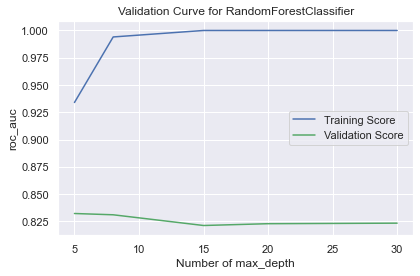

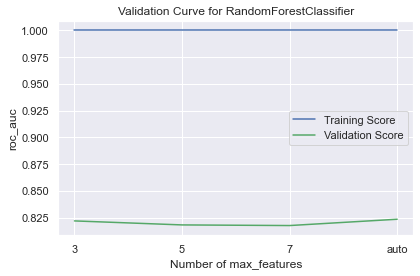

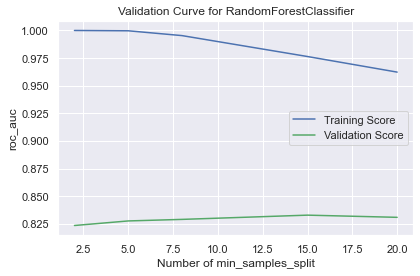

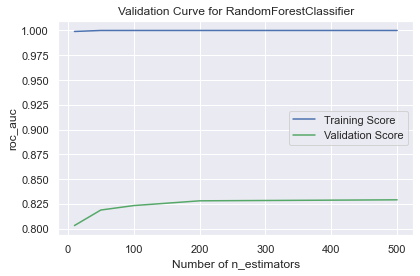

[5, 8, 15, 20, 30, None]

In [152]:
for i in range(len(rf_val_params)): 
    val_curve_params(rf_model,X,y,rf_val_params[i][0],rf_val_params[i][1])  
rf_val_params[0][1]